<a href="https://colab.research.google.com/github/tottenjordan/stock-pred/blob/master/EDA/stockRet_CGNX_TechIndicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Technical Indicators
* A technical indicator is a mathematical calculation that can be applied to an asset's patterns e.g., price, volume, or even another technical indicator
* Technical Indicators do not analyze any part of the fundamental business e.g., earnings, revenue, cash flow, profit margins, etc.

* **Categories**
> * **Leading** - give trade signals when the **trend is about to start**
>> * try to predict price, leading the price movement
>> * e.g., MACD, RSI
> * **Lagging** - indicators that **follow the price action**
>> * Give signal after the trend or reversal has started
>> * e.g., Moving Average

* **Leading and Lagging** indicators belong to one of several **types:**

> * **Trend**
>> * Measure the diretion and strength of a trend
>> * Uses price averaging to establish baselin, moving above or below singals bull/bear trends
>> * Moving Avg & MACD --> (Lagging)
>> * Parabolic Stop and Reverse --> (Leading)

> * **Momentum**
>> * Identify speed of price movement by comparing prices over time
>> * Can be used to analyze volume
>> * Compare closing prices to previous closing prices
>> * Typically appear as oscillators that change as momentum changes
>> * A divergence between price and a momentum indicator can signal a change in future prices
>> * **Stochasitc Oscillator, CCI, RSI** --> (Leading) 

> * **Volatility**
>> * Measure the rat of price movement, regardless of direction
>> * Typically based on change in the highest and lowest historical prices
>> * Bollinger Bands, Average True Range, Vortex --> (Lagging) 

> * **Volume**
>> * Measure strength of a trend or confirm a trading direction based on averaging or smoothing raw volume
>> * Strongest trends typically occur while volume increases - increases in volume can lead to large movement in price
>> * Chaiken Oscillator, OBV --> (Leading)
>> * Volume Rate of Change --> (Lagging)

### pip and package

In [ ]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib as ta

Selecting previously unselected package libta-lib0.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.18-cp36-cp36m-linux_x86_64.whl size=1531810 sha256=fe9e1389e804dfad2fe7baadd25f148d2267d11b59ffc03d4502a809ae6d05d3
  Stored in directory: /root/.cache/pip/wheels/11/cc/88/20dc42c28a07efb297dad4303948ef6dd4a3c7257553db8f09
Successfully built ta-lib


In [ ]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=7d8bdf0be11729606f02598781a853cdc20162972f7564681718e690362cc866
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
!pip install mpl_finance

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None, 'display.max_rows', None)

# finance data
import yfinance as yf

import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import matplotlib.patches as mpatches

import datetime as dt
from mpl_finance import candlestick_ohlc

import warnings
warnings.filterwarnings("ignore")

### Data

In [27]:
# input
symbol = 'CGNX'
start = '2017-04-30' # consistent start: 2018-02-17... start well before to get long term trends
end = '2020-07-13'

# Read data 
df = yf.download(symbol,start,end)
df = df.rename(columns={'Adj Close':'Adj_Close'})
df['returns'] = df['Adj_Close'].pct_change()
df['log_returns'] = np.log(df['Adj_Close']).diff()

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj_Close   Volume  \
Date                                                                         
2017-05-01  43.305000  43.389999  42.080002  42.814999  42.276123  2338400   
2017-05-02  42.650002  45.145000  42.279999  45.110001  44.542233  5112600   
2017-05-03  44.759998  44.840000  43.650002  44.365002  43.806610  2498600   
2017-05-04  44.365002  44.930000  44.105000  44.305000  43.747356  1613800   
2017-05-05  44.494999  45.000000  44.485001  45.000000  44.433620  1397800   

             returns  log_returns  
Date                               
2017-05-01       NaN          NaN  
2017-05-02  0.053603     0.052215  
2017-05-03 -0.016515    -0.016653  
2017-05-04 -0.001353    -0.001354  
2017-05-05  0.015687     0.015565

# Indicators

## **Aroon**

[Stock Charts: Aroon](https://school.stockcharts.com/doku.php?id=technical_indicators:aroon)

[Stock Charts: Aroon Oscillator](https://school.stockcharts.com/doku.php?id=technical_indicators:aroon_oscillator)

* **Aroon** measures the number of **periods since** price recorded an **x-day high or low**
> * Determines if stock is trending and **strength of the trend**
> * Spot **emerging trends** and identify consolidations 
> * Define correction periods and **Anticipate reversals**
* **2 Indicators**
> * **Aroon-Up (25-day)** --> measures the number of days since a 25-day high
> * **Aroon-Down (25-day)** --> measures the number of days since a 25-day low
* Most momentum oscillators focus on price relative to time
> * **Aroon** is **unique** because it focues on **time relative to price**

## **Aroon Oscillator**
* The difference between Aroon-Up and Aroon-Down
* **Above 0** means **Aroon-Up is greater then Aroon-Down**
> * This implies that prices are making **new highs more recently than new lows** 
* **Below 0** means **Aroon-down is greater than Aroon-Up**
> * This implies prices are recording **new lows more recently than new highs**
* Generally, **surge +50** reflects a **strong upside move**, while **plunge -50** indicates **strong downside move**

### **Suggested Signals** (TO DO):
* **Bullish Signal** (expanding volume): Find where AO crossed from negative to positive AND daily volume was above 50-day moving average
* **Bearish Signal** (expanding volume): Find where AO crossed from positive to negative and daily volume was above the 5-day moving average
* **Consolidation**: Find where Aroon-Up and Aroon-Down are both below 20 (first to break above 50 indicates the next directional clue)

In [28]:
# Select Period
n = 25 
high_max = lambda xs: np.argmax(xs[::-1])
low_min = lambda xs: np.argmin(xs[::-1])

df['Days_since_last_High'] = df['High'].rolling(center=False,min_periods=0,window=n).apply(func=high_max).astype(int)
df['Days_since_last_Low'] = df['Low'].rolling(center=False,min_periods=0,window=n).apply(func=low_min).astype(int)
    
df['Aroon_Up'] = ((25-df['Days_since_last_High'])/25) * 100
df['Aroon_Down'] = ((25-df['Days_since_last_Low'])/25) * 100
df['Aroon_Oscillator'] = df['Aroon_Up'] - df['Aroon_Down']

df['AO_Positive'] = df['Aroon_Oscillator'] > 0

df = df.drop(['Days_since_last_High', 'Days_since_last_Low'],axis=1)

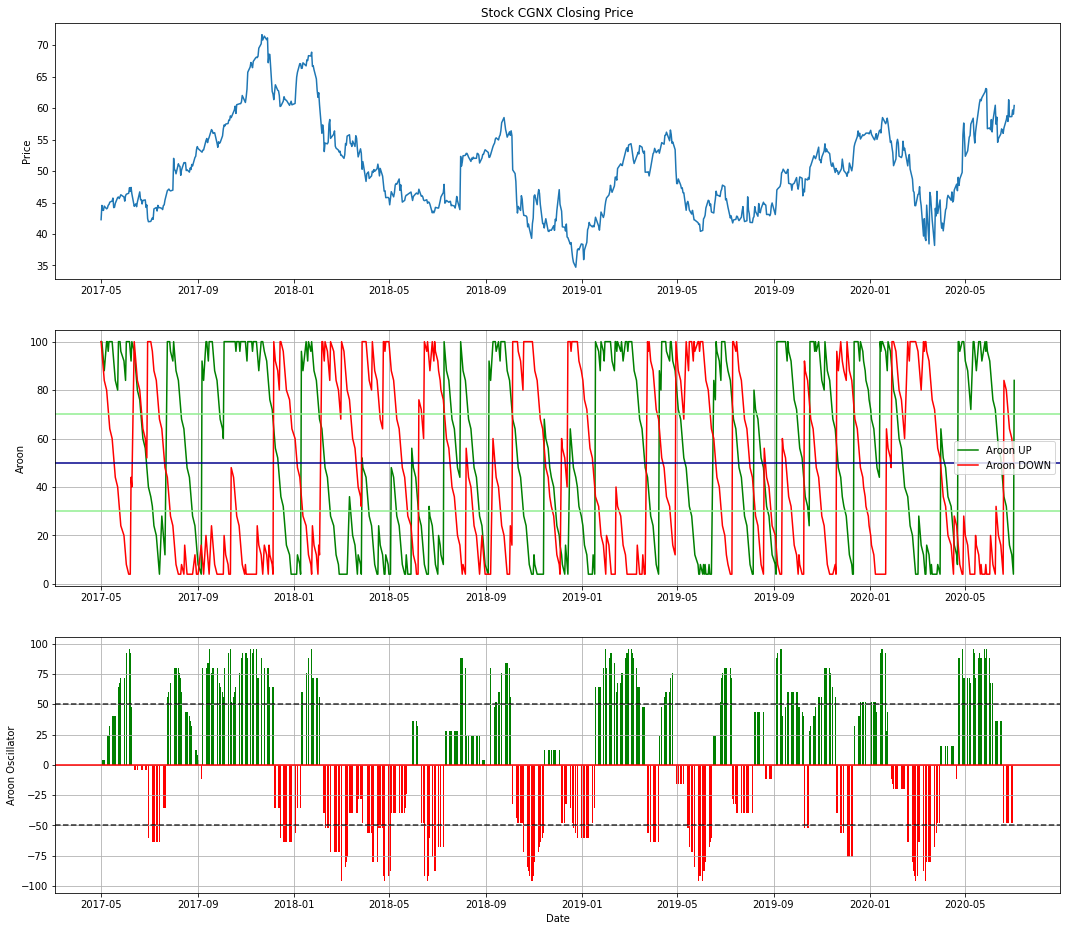

In [ ]:
fig = plt.figure(figsize=(18,16))

ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj_Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
# ax1.legend(loc='best')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['Aroon_Up'], label='Aroon UP', color='g')
ax2.plot(df['Aroon_Down'], label='Aroon DOWN', color='r')
ax2.axhline(y=70, color='lightgreen')
ax2.axhline(y=50, color='darkblue')
ax2.axhline(y=30, color='lightgreen')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Aroon')

# df['AO_Positive'] = df['Aroon_Oscillator'] > 0
ax3 = plt.subplot(3, 1, 3)
ax3.bar(df.index, df['Aroon_Oscillator'], color=df.AO_Positive.map({True: 'g', False: 'r'}))
ax3.axhline(y=50, color='black', linestyle="--", alpha=0.8)
ax3.axhline(y=-50, color='black', linestyle="--", alpha=0.8)
ax3.axhline(y=0, color='red')
ax3.grid()
# ax3.legend(loc='best')
ax3.set_ylabel('Aroon Oscillator')
ax3.set_xlabel('Date');


## Balance of Power

[GitHub](https://github.com/LastAncientOne/Stock_Analysis_For_Quant/blob/master/Python_Stock/Technical_Indicators/Balance_of_Power.ipynb)

[Market Volume](https://www.marketvolume.com/technicalanalysis/balanceofpower.asp)

* Price-based indicator used to evaluate strength of buyers and sellers

In [29]:
df['BoP'] = (df['Adj_Close'] - df['Open']) / (df['High'] - df['Low'])
df['VolumePositive'] = df['Open'] < df['Adj_Close']

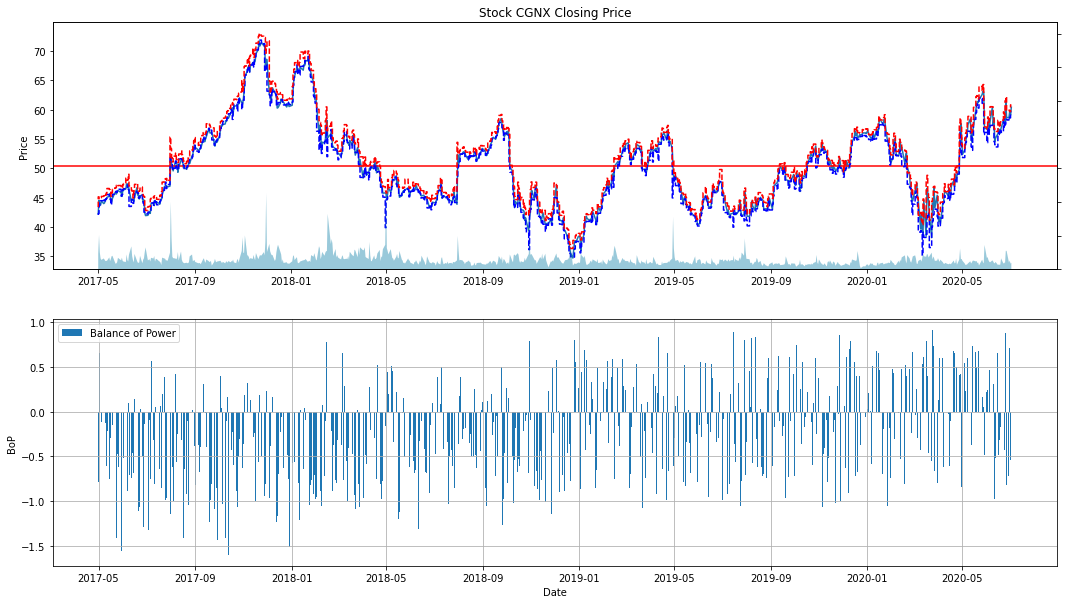

In [ ]:
# Line Chart
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj_Close'])
ax1.axhline(y=df['Adj_Close'].mean(),color='r')
ax1.step(df.index, df['Low'], c='blue', linestyle='--')
ax1.step(df.index, df['High'], c='red', linestyle='--')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(df.index, df['BoP'], label='Balance of Power')
ax2.grid()
ax2.set_ylabel('BoP')
ax2.set_xlabel('Date')
ax2.legend(loc='best');

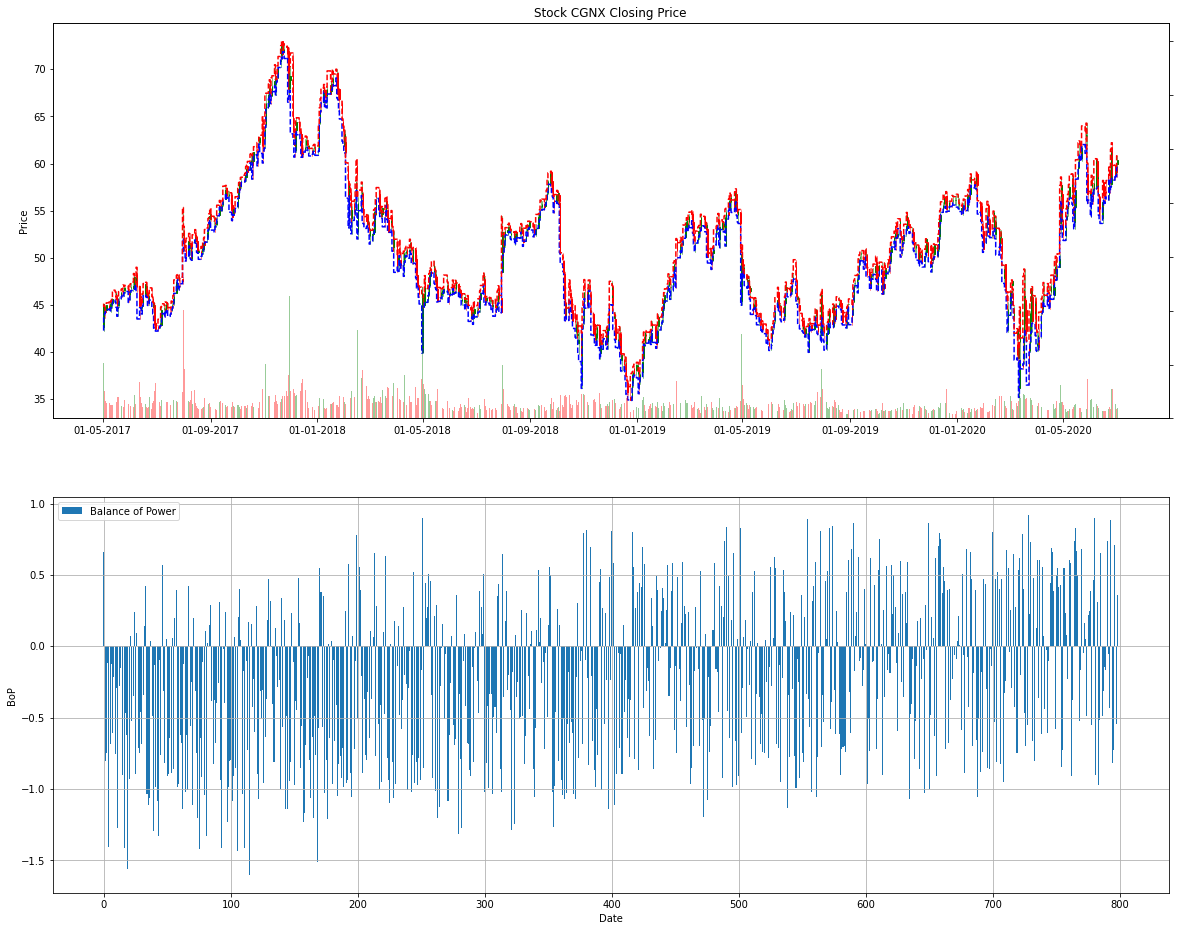

In [ ]:
dfc = df.copy()
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'])

# Candlestick with Balance of Power
fig = plt.figure(figsize=(20,16))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1.step(dfc.Date, dfc['Low'], c='blue', linestyle='--')
ax1.step(dfc.Date, dfc['High'], c='red', linestyle='--')
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*dfc.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(dfc.index, dfc['BoP'], label='Balance of Power')
ax2.grid()
ax2.set_ylabel('BoP')
ax2.set_xlabel('Date')
ax2.legend(loc='best');

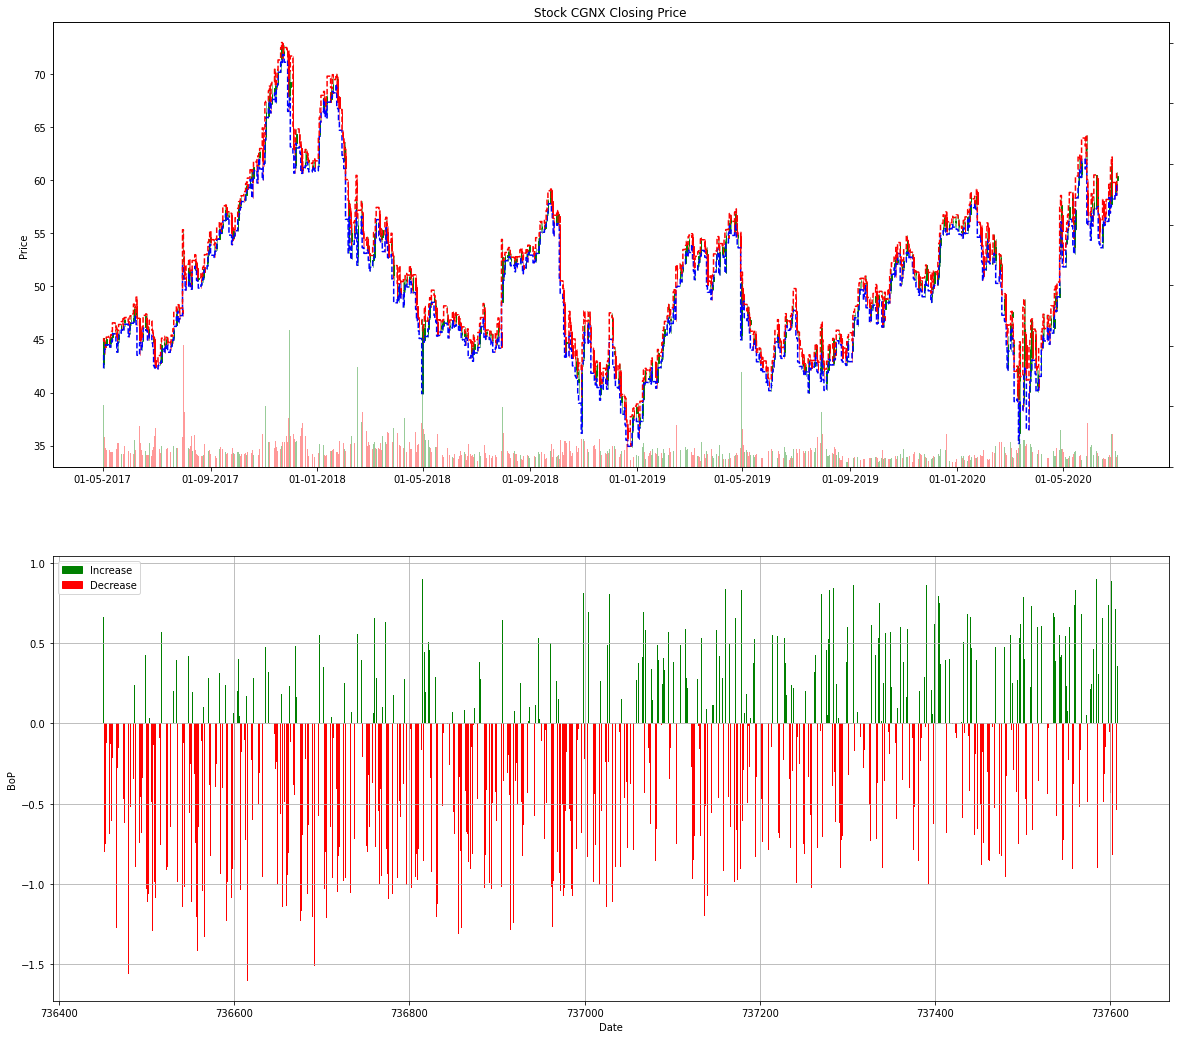

In [ ]:
fig = plt.figure(figsize=(20,18))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1.step(dfc.Date, dfc['Low'], c='blue', linestyle='--')
ax1.step(dfc.Date, dfc['High'], c='red', linestyle='--')
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*dfc.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
status = []
for i in dfc['BoP']:
    if i >= 0:
        status.append(True) # Increase
    else:    
        status.append(False) # Decrease
dfc['BoP_Status'] = status
#dfc['Positive'] = dfc['BOP'] > 0
colors2 = dfc.BoP_Status.map({True: 'g', False: 'r'})
Increase = mpatches.Patch(color='g', label='Increase')
Decrease = mpatches.Patch(color='r', label='Decrease')
ax2.bar(dfc.Date, dfc['BoP'], color = colors2)
ax2.grid()
ax2.set_ylabel('BoP')
ax2.set_xlabel('Date')
ax2.legend(handles=[Increase,Decrease]);

## B Indicator and Bollinger Bands

[GitHub](https://github.com/LastAncientOne/Stock_Analysis_For_Quant/blob/master/Python_Stock/Technical_Indicators/B_indicator.ipynb)

[Stock Charts: B Indicator Explained](https://school.stockcharts.com/doku.php?id=technical_indicators:bollinger_band_perce#:~:text=%25B%20quantifies%20a%20security's%20price,is%20at%20the%20lower%20band)

[Schwab](https://www.schwab.com/resource-center/insights/content/3-ways-to-use-bollinger-bands-to-help-predict-price-moves#:~:text=When%20the%20bands%20are%20relatively,and%20poised%20to%20move%20higher.)

* %B is a ***momentum oscillator*** which quantifies a security's price relative to the upper and lower Bollinger Band
> * **%B < 0** --> price is below the lower band
> * **%B = 0** --> price is at the lower band
> * **0 < %B < 0.5** --> price is between the lower and middle band (20-day SMA)
> * **0.5 < %B < 1** --> price is between the middle and upper band (20-day SMA)
> * **%B = 1** --> price is at the upper band
> * **%B > 1** --> price is above the upper band
* Bollinger Band default (20,2) --> bands are set 2 standard deviations above and below the 20-day simple moving average (the middle band)
* **Look for momentum trends**, then **identify overbought** and **oversold situations**
* **%B Look for:**
> * short-term oversold situations when the **medium trend is up**
> * short-term overbought situations when the **medium trend is down**

* **Bollinger Bands:**
> * **The Squeeze**
>> * When the gap between the outside bands barrows siqnificantly (squeezing price)
>> * Signals low volatility
>> * Set buy entry just above the upper band
>> * Set sell-short entry just below lower band
>> * be sure this persists for reasonable amount of time (e.g., 4 weeks if using 20-day MA)
> * **The Double Botom**
>> * Resembles a W, because the stock sells off to a low, rallies, then tests the previous low before rising to a new short term high
>> * The **first low** touches or dips **below the lower band**
>> * The **second low** occurs **above the lower band**
>> * Set buy stop as price moves above second low
>> * Set protective sell stop below double bottom
> * **The Breakout**
>> * When a stock breaks higher, the upper band may increase too since price and volatility are both increasing
>> * Lower band moves in opposite direction (becasue volatility is expanding) and will continue as long as there is strong momentum behind the breakout

In [30]:
# create Bollinger bands
upper, middle, lower = ta.BBANDS(df['Adj_Close'])

# Create %B Indicator
df['BI'] = (df['Adj_Close'] - lower)/(upper - lower)
df.head()

Open       High        Low      Close  Adj_Close   Volume  \
Date                                                                         
2017-05-01  43.305000  43.389999  42.080002  42.814999  42.276123  2338400   
2017-05-02  42.650002  45.145000  42.279999  45.110001  44.542233  5112600   
2017-05-03  44.759998  44.840000  43.650002  44.365002  43.806610  2498600   
2017-05-04  44.365002  44.930000  44.105000  44.305000  43.747356  1613800   
2017-05-05  44.494999  45.000000  44.485001  45.000000  44.433620  1397800   

             returns  log_returns  Aroon_Up  Aroon_Down  Aroon_Oscillator  \
Date                                                                        
2017-05-01       NaN          NaN     100.0       100.0               0.0   
2017-05-02  0.053603     0.052215     100.0        96.0               4.0   
2017-05-03 -0.016515    -0.016653      96.0        92.0               4.0   
2017-05-04 -0.001353    -0.001354      92.0        88.0               4.0   
2017-05-05  0.015687     0.015565      88.0        84.0               4.0   

            AO_Positive       BoP  VolumePositive        BI  
Date                                                         
2017-05-01        False -0.785404           False       NaN  
2017-05-02         True  0.660464            True       NaN  
2017-05-03         True -0.801167           False       NaN  
2017-05-04         True -0.748660           False       NaN  
2017-05-05         True -0.119182           False  0.707878

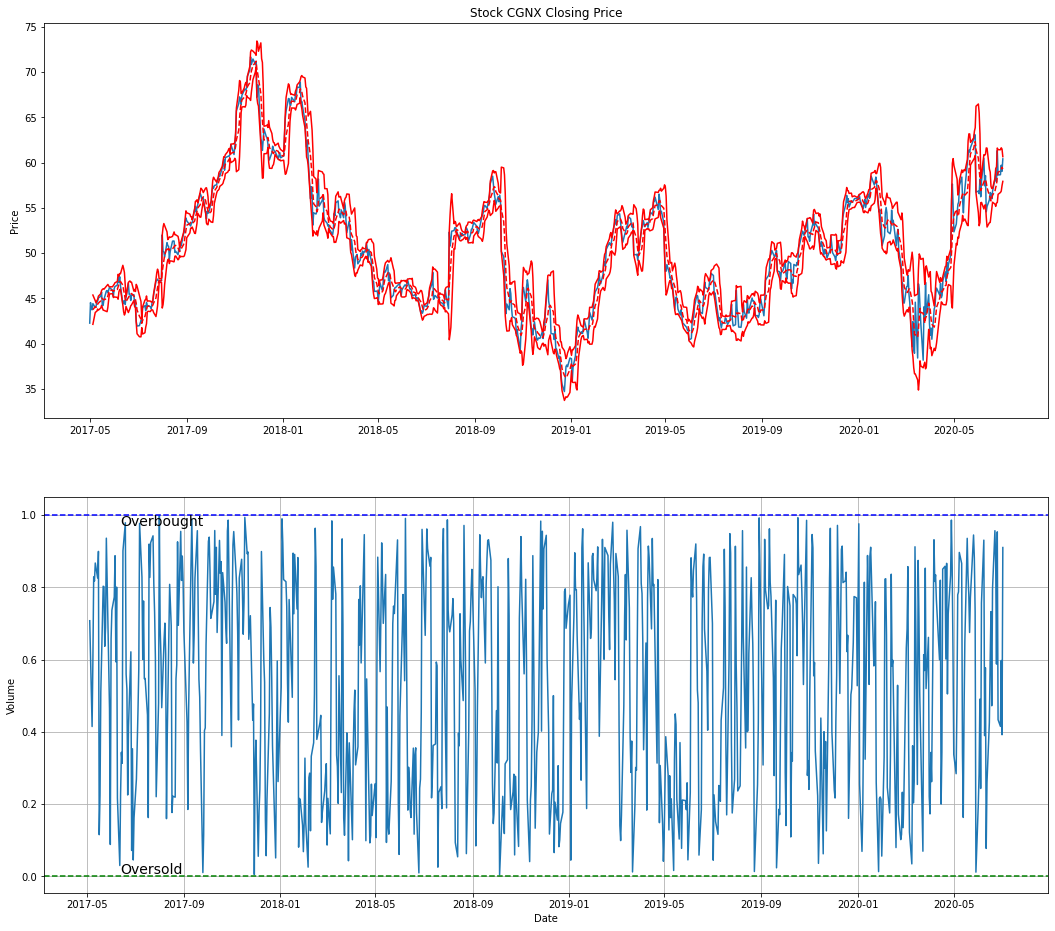

In [ ]:
fig = plt.figure(figsize=(18,16))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj_Close'])
ax1.plot(upper, color='red')
ax1.plot(middle, color='red', linestyle='--')
ax1.plot(lower, color='red')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['BI'], label='%B Indicator')
ax2.text(s='Overbought', x=df.index[30], y=1, fontsize=14, verticalalignment='top')
ax2.text(s='Oversold', x=df.index[30], y=0, fontsize=14, verticalalignment='bottom')
ax2.axhline(y=1, color='blue', linestyle='--')
ax2.axhline(y=0, color='green', linestyle='--')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date');

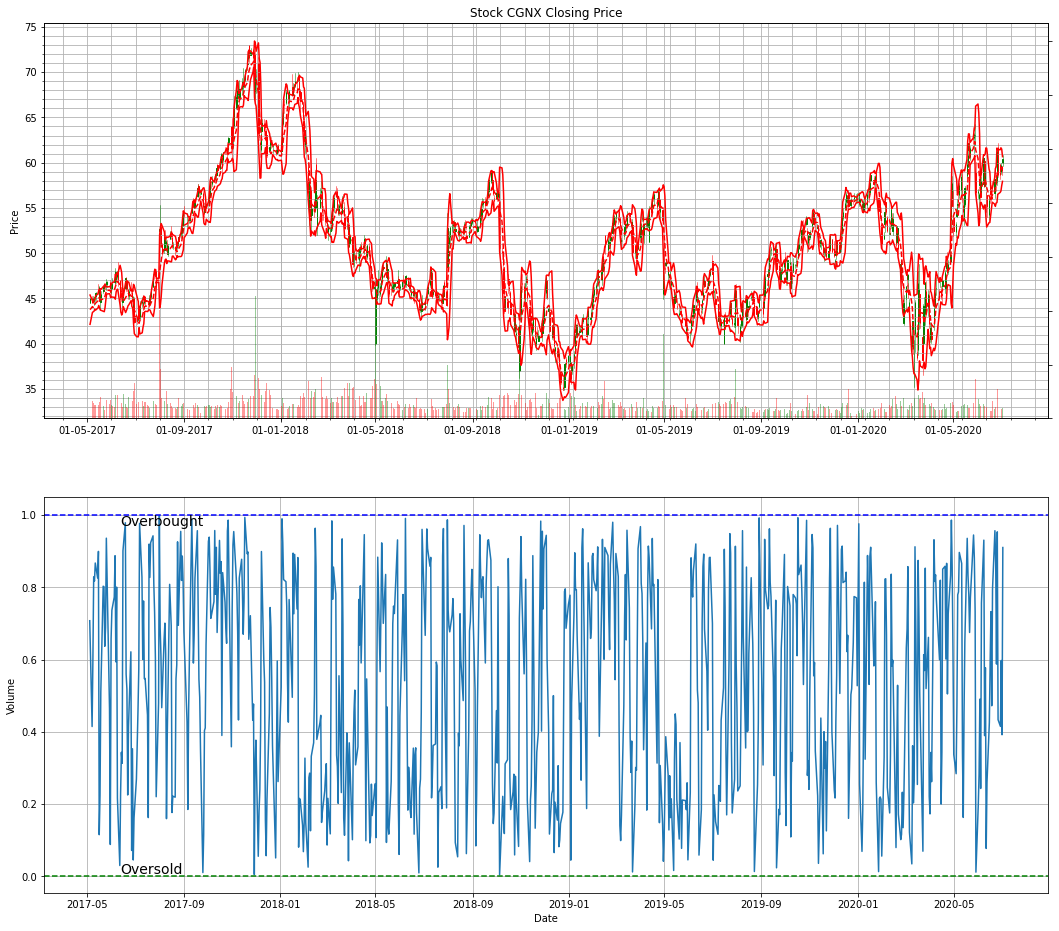

In [ ]:
# Dataframe for Visualization
dfc = df.copy()
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'])

# Candlestick with %B Indicator
fig = plt.figure(figsize=(18,16))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(upper, color='red')
ax1.plot(middle, color='red', linestyle='--')
ax1.plot(lower, color='red')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['BI'], label='%B Indicator')
ax2.text(s='Overbought', x=df.index[30], y=1, fontsize=14, verticalalignment='top')
ax2.text(s='Oversold', x=df.index[30], y=0, fontsize=14, verticalalignment='bottom')
ax2.axhline(y=1, color='blue', linestyle='--')
ax2.axhline(y=0, color='green', linestyle='--')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date');

## Beta
[Beta Indicator GitHub](https://github.com/LastAncientOne/Stock_Analysis_For_Quant/blob/master/Python_Stock/Technical_Indicators/Beta_Indicator.ipynb)

[Beta Explained](https://www.marketvolume.com/technicalanalysis/beta.asp)

* Compares stock's price movement to the movements of the indexes over the same period of time

* **Used to measure volatility** or risk **of a stock** (ETF) **relative to the overall risk** (volatility) **of** the stock market (**market indexes**)

> * Common to use S&P 500 index (^GSPC) as a benchmark of the overall stock market, but other can be used too

* When **stock moves with** market movements, **Beta is (+):**
> * Beta > 1 if stock's movements more volatile than the overall market(s)
> * Beta < 1 if stock's movements are less volatile than overall market(s)
* When **stock's movements are inversed** to market movements, **Beta is (-):**
> * |Beta| > 1 if stock's movements more volatile 
> * |Beta| < 1 if stock's movements less volatile

* **How to use:**
> * **Not generally used to generate trading signals**
> * Used to filter stocks by volatility and trading risk
> * **Beta used as component to other indicators** focused on risk assessment and expected rate of return, e.g., CAMP (Capital Asset Pricing Model)
>> * **Expected Rate of Return** = **RF** + Beta(**RM** - **RF**)
>>> * **RM** = expected market return
>>> * **RF** = risk free investments interest rate

In [31]:
# market indices
gspc = '^GSPC'
dow = '^DJI'
vix = '^VIX'
ixic = '^IXIC'

# valid start and end dates
start = df.first_valid_index()
end = df.last_valid_index() 

# GSPC returns
mk_gspc = yf.download(gspc,start,end)
mk_gspc = mk_gspc.rename(columns={'Adj Close':'Adj_Close'})
mk_gspc['returns'] = mk_gspc['Adj_Close'].pct_change().dropna()

# DJI returns
mk_dow = yf.download(dow,start,end)
mk_dow = mk_dow.rename(columns={'Adj Close':'Adj_Close'})
mk_dow['returns'] = mk_dow['Adj_Close'].pct_change().dropna()

# VIX returns
mk_vix = yf.download(vix,start,end)
mk_vix = mk_vix.rename(columns={'Adj Close':'Adj_Close'})
mk_vix['returns'] = mk_vix['Adj_Close'].pct_change().dropna()

# IXIC returns
mk_ixic = yf.download(ixic,start,end)
mk_ixic = mk_ixic.rename(columns={'Adj Close':'Adj_Close'})
mk_ixic['returns'] = mk_ixic['Adj_Close'].pct_change().dropna()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [32]:
# Calculate moving average (SMA) of change, 
# change deviations, variance, and Covariance

# Select period to calculate Beta
n = 5

# GSPC
covar_gspc = df['returns'].rolling(n).cov(mk_gspc['returns'])
variance_gspc = mk_gspc['returns'].rolling(n).var()
df['Beta_GSPC'] = covar_gspc / variance_gspc

# DJI
covar_dow = df['returns'].rolling(n).cov(mk_dow['returns'])
variance_dow = mk_dow['returns'].rolling(n).var()
df['Beta_DJI'] = covar_dow / variance_dow

# VIX
covar_vix = df['returns'].rolling(n).cov(mk_vix['returns'])
variance_vix = mk_vix['returns'].rolling(n).var()
df['Beta_VIX'] = covar_vix / variance_vix

# IXIC
covar_ixic = df['returns'].rolling(n).cov(mk_ixic['returns'])
variance_ixic = mk_ixic['returns'].rolling(n).var()
df['Beta_IXIC'] = covar_ixic / variance_ixic

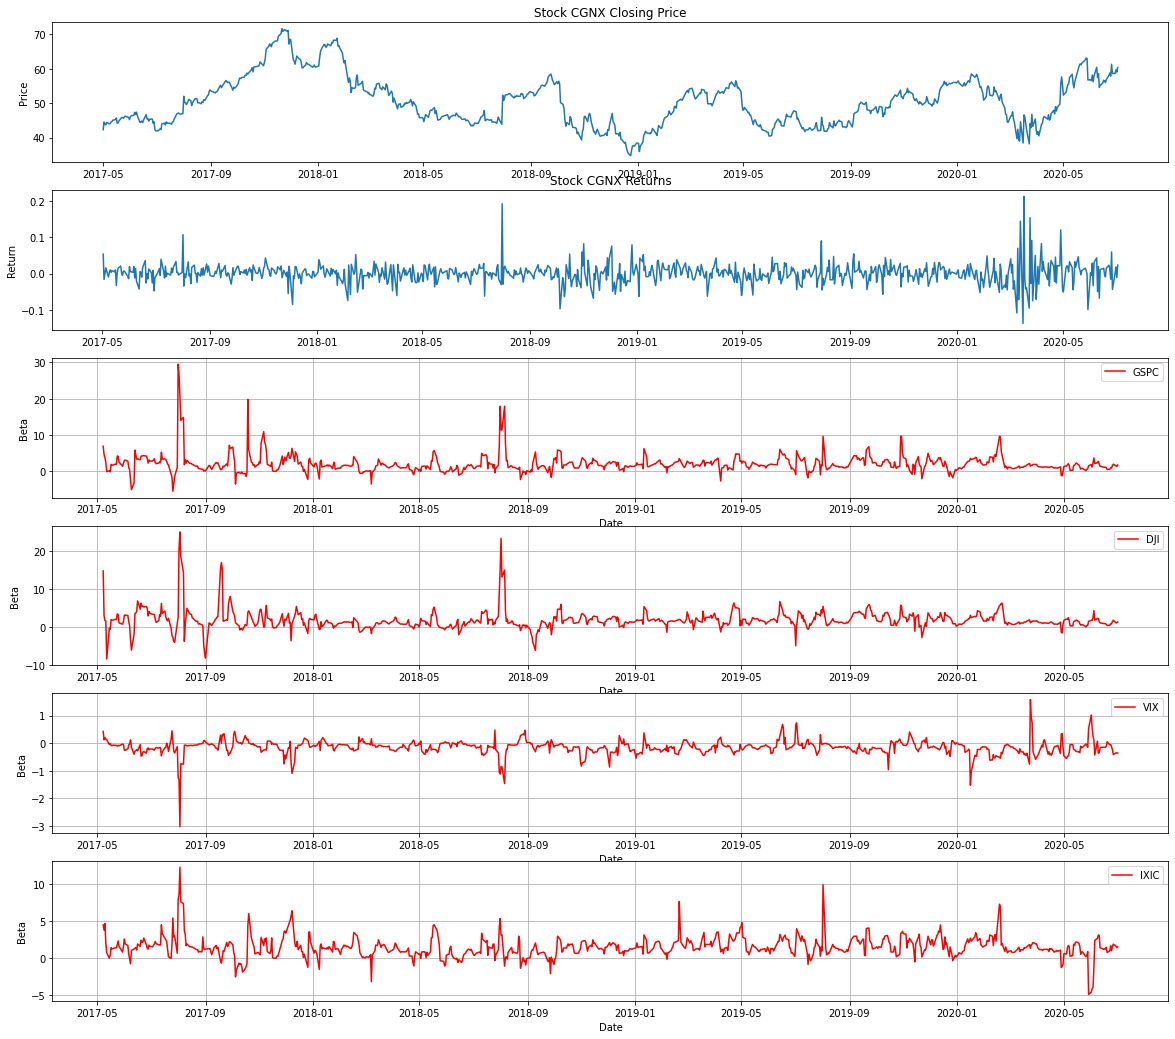

In [ ]:
fig = plt.figure(figsize=(20,18))

# CGNX - Closing Price
ax1 = plt.subplot(6, 1, 1)
ax1.plot(df['Adj_Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

# CGNX - Returns 
ax2 = plt.subplot(6, 1, 2)
ax2.plot(df['returns'])
ax2.set_title('Stock '+ symbol +' Returns')
ax2.set_ylabel('Return')

ax3 = plt.subplot(6, 1, 3)
ax3.plot(df['Beta_GSPC'], label='GSPC', color='red')
#ax2.axhline(y=0, color='blue', linestyle='--')
ax3.grid()
ax3.set_ylabel('Beta')
ax3.set_xlabel('Date')
ax3.legend(loc='best')

ax4 = plt.subplot(6, 1, 4)
ax4.plot(df['Beta_DJI'], label='DJI', color='red')
#ax4.axhline(y=0, color='blue', linestyle='--')
ax4.grid()
ax4.set_ylabel('Beta')
ax4.set_xlabel('Date')
ax4.legend(loc='best')

ax5 = plt.subplot(6, 1, 5)
ax5.plot(df['Beta_VIX'], label='VIX', color='red')
#ax5.axhline(y=0, color='blue', linestyle='--')
ax5.grid()
ax5.set_ylabel('Beta')
ax5.set_xlabel('Date')
ax5.legend(loc='best')

ax6 = plt.subplot(6, 1, 6)
ax6.plot(df['Beta_IXIC'], label='IXIC', color='red')
#ax6.axhline(y=0, color='blue', linestyle='--')
ax6.grid()
ax6.set_ylabel('Beta')
ax6.set_xlabel('Date')
ax6.legend(loc='best');

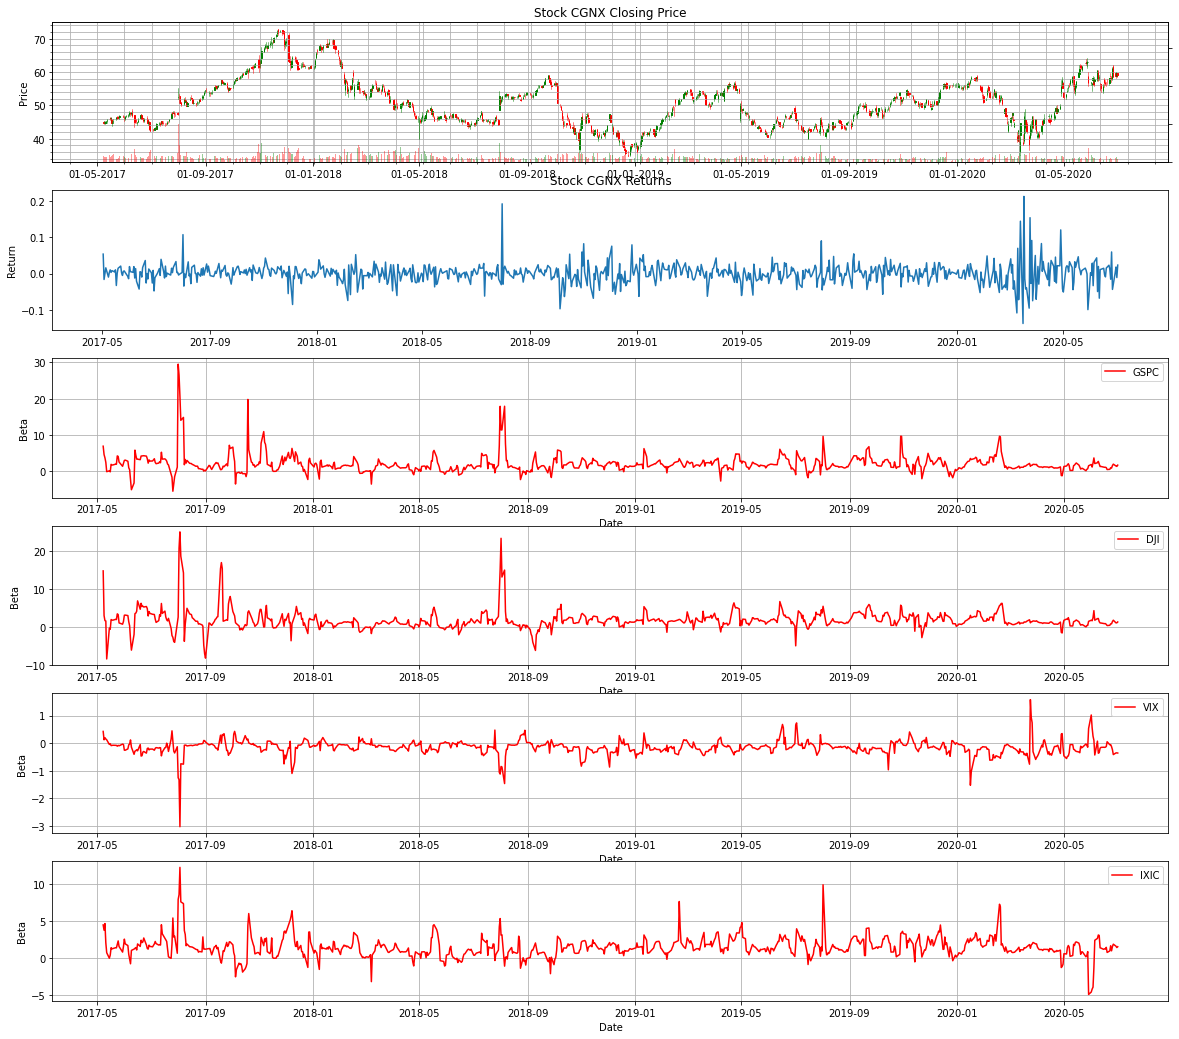

In [ ]:
# dataframe for visualization
dfc = df.copy()
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'])

# Candlesticks with Beta
fig = plt.figure(figsize=(20,18))

ax1 = plt.subplot(6, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

# CGNX - Returns 
ax2 = plt.subplot(6, 1, 2)
ax2.plot(df['returns'])
ax2.set_title('Stock '+ symbol +' Returns')
ax2.set_ylabel('Return')

ax3 = plt.subplot(6, 1, 3)
ax3.plot(df['Beta_GSPC'], label='GSPC', color='red')
#ax2.axhline(y=0, color='blue', linestyle='--')
ax3.grid()
ax3.set_ylabel('Beta')
ax3.set_xlabel('Date')
ax3.legend(loc='best')

ax4 = plt.subplot(6, 1, 4)
ax4.plot(df['Beta_DJI'], label='DJI', color='red')
#ax4.axhline(y=0, color='blue', linestyle='--')
ax4.grid()
ax4.set_ylabel('Beta')
ax4.set_xlabel('Date')
ax4.legend(loc='best')

ax5 = plt.subplot(6, 1, 5)
ax5.plot(df['Beta_VIX'], label='VIX', color='red')
#ax5.axhline(y=0, color='blue', linestyle='--')
ax5.grid()
ax5.set_ylabel('Beta')
ax5.set_xlabel('Date')
ax5.legend(loc='best')

ax6 = plt.subplot(6, 1, 6)
ax6.plot(df['Beta_IXIC'], label='IXIC', color='red')
#ax6.axhline(y=0, color='blue', linestyle='--')
ax6.grid()
ax6.set_ylabel('Beta')
ax6.set_xlabel('Date')
ax6.legend(loc='best');

## Commodity Channel Index (CCI)

[GitHub Link](https://github.com/LastAncientOne/Stock_Analysis_For_Quant/blob/master/Python_Stock/Technical_Indicators/CCI.ipynb)

[Stock Charts Link](https://school.stockcharts.com/doku.php?id=technical_indicators:commodity_channel_index_cci)

### **Used to identify new trends or warn of extreme conditions**
* Can be used to **identify overbought** and **oversold levels**
> * Most CCI movement occurs between $(-100, 100)$ **-->** exceeding this range shows unusual strength or weakness
> * $(-100, 100)$ works for a trading range, but $(-200, 200)$ is more reflective of true extremes
> * Overbought/Oversold levels also depend on the volatilty of the stock **-->** index ETF (e.g., SPY) will usually be smaller than those of most stocks

* Used as either a **coincident** or a **leading** indicator
> * As a **Coincident Indicator:**
>> * Surges **above 100** reflect **strong** price action; can signal the **start of an uptrend**
>> * Plunges **below -100** reflect **strong** price action; can signal the **start of a downtrend**
> * As a **Leading Indicator:**
>> * Look for overbought or oversold conditions that may foreshadow a mean reversion
>> * Bullish and Bearish divergences can be used to **detect early momentum shifts** and **anticipate trend reversals**

* Measures the **current price level relative to** an **average price level** over a given period
> * Strength = high CCI 
> * Weakness = low CCI
> ### $CCI = \frac{TP - SMA(n)_{TP}}{C  (Mean Deviation)}$
>> * $n = 20$
>> * $TP = Typical Price = \frac{(High + Low + Close)}{3}$
>> * $Constant = C = 0.15$

* **Constant** of (0.15) ensures **approx. 70-80% of CCI values** fall between $(-100, 100)$
> * The % depends on the look back period
> * **Shorter CCI** (e.g., n = 10) will be **more volatile** with smaller % of values between -100 and +100
> * **Longer CCI** (e.g., n = 40) will be **less volatile**, with higher % of values between -100 and +100

In [33]:
# Select period
n = 20

# Typical Price
df['TP'] = (df['High'] + df['Low'] + df['Adj_Close'])/3
df['SMA_TP'] = df['TP'].rolling(n).mean()
df['SMA_STD'] = df['TP'].rolling(n).std()

# CCI
df['CCI'] = (df['TP'] - df['SMA_TP']) / (0.015*df['SMA_STD'])

# Drop TP, SMA, STD
df = df.drop(['TP', 'SMA_TP', 'SMA_STD'],axis=1)

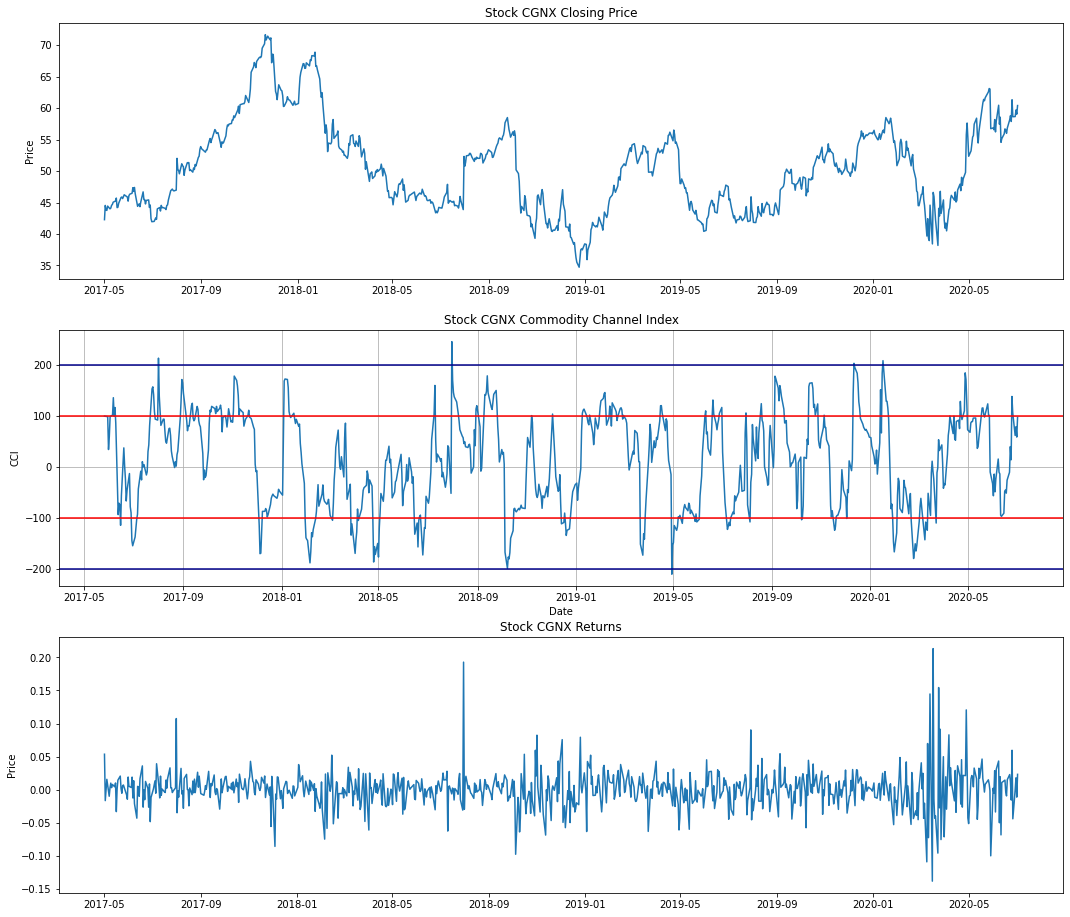

In [ ]:
# plot Stock Price, Returns, and CCI with 100 and 200 bands
fig = plt.figure(figsize=(18,16))

ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj_Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['CCI'], label='Commodity Channel Index')
ax2.set_title('Stock '+ symbol +' Commodity Channel Index')
ax2.axhline(y=100, color='red')
ax2.axhline(y=-100, color='red')
ax2.axhline(y=200, color='darkblue')
ax2.axhline(y=-200, color='darkblue')
ax2.grid()
ax2.set_ylabel('CCI')
ax2.set_xlabel('Date')

ax3 = plt.subplot(3, 1, 3)
ax3.plot(df['returns'])
ax3.set_title('Stock '+ symbol +' Returns')
ax3.set_ylabel('Price');

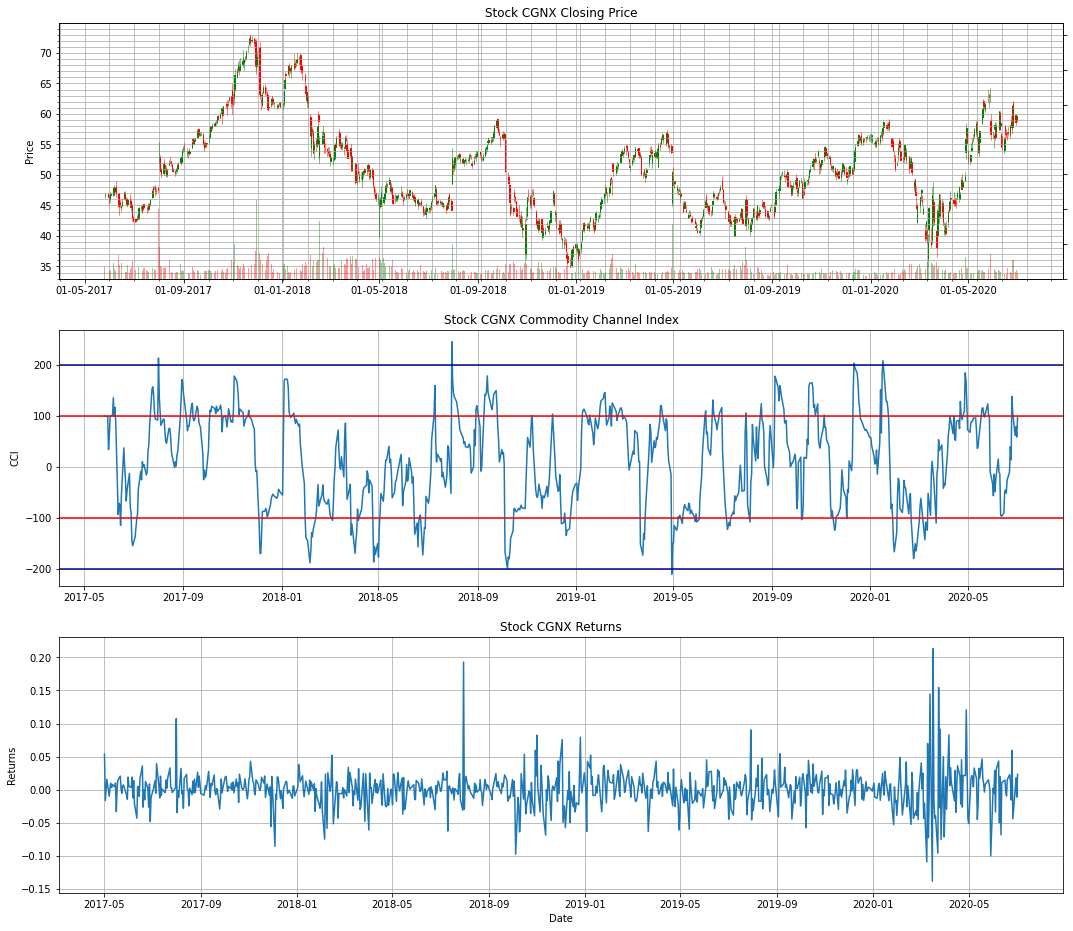

In [ ]:
# Dataframe for Visualization
dfc = df.copy()
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'])

# Candlestick with CCI
fig = plt.figure(figsize=(18,16))

ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['CCI'], label='Commodity Channel Index')
ax2.set_title('Stock '+ symbol +' Commodity Channel Index')
ax2.axhline(y=100, color='red')
ax2.axhline(y=-100, color='red')
ax2.axhline(y=200, color='darkblue')
ax2.axhline(y=-200, color='darkblue')
ax2.grid()
ax2.set_ylabel('CCI')

ax3 = plt.subplot(3, 1, 3)
ax3.plot(df['returns'])
ax3.grid()
ax3.set_title('Stock '+ symbol +' Returns')
ax3.set_xlabel('Date')
ax3.set_ylabel('Returns');

## Coppock Curve

[Stock Charts](https://school.stockcharts.com/doku.php?id=technical_indicators:coppock_curve)

[Investopedia](https://www.investopedia.com/terms/c/coppockcurve.asp)

* **Momentum indicator** used to identify long or short-term trends (depending on the weighted average time horizon)
> * The **Rate-of-Change** indicator is used with periods of 11 and 14 months
> * This indicator is then smoothed with a weighted moving average
> * Originally used for market indices and ETFs

* **Signals**
> * Main signals generated with **crosses above and below the zero line**
> * Using monthly data, this indicator will not trigger many signals
> * Time frame **can be adapted** to fit **intraday, daily, and weekly trends**
> * Shorter time frames will make the Coppick Curve more sensitive and faster 
> * **False signals** occur during **short, volatile periods** of trading when curve quickly bounces above and below the zero line

In [34]:
# Select Periods
n = [11,14]

for nd in n:
  df['ROC_'+str(nd)] = ((df['Adj_Close'] - df['Adj_Close'].shift(nd))/df['Adj_Close'].shift(nd)) * 100

df['COPP'] = (df['ROC_14']+df['ROC_11']).ewm(ignore_na=False,span=10,min_periods=10,adjust=True).mean()

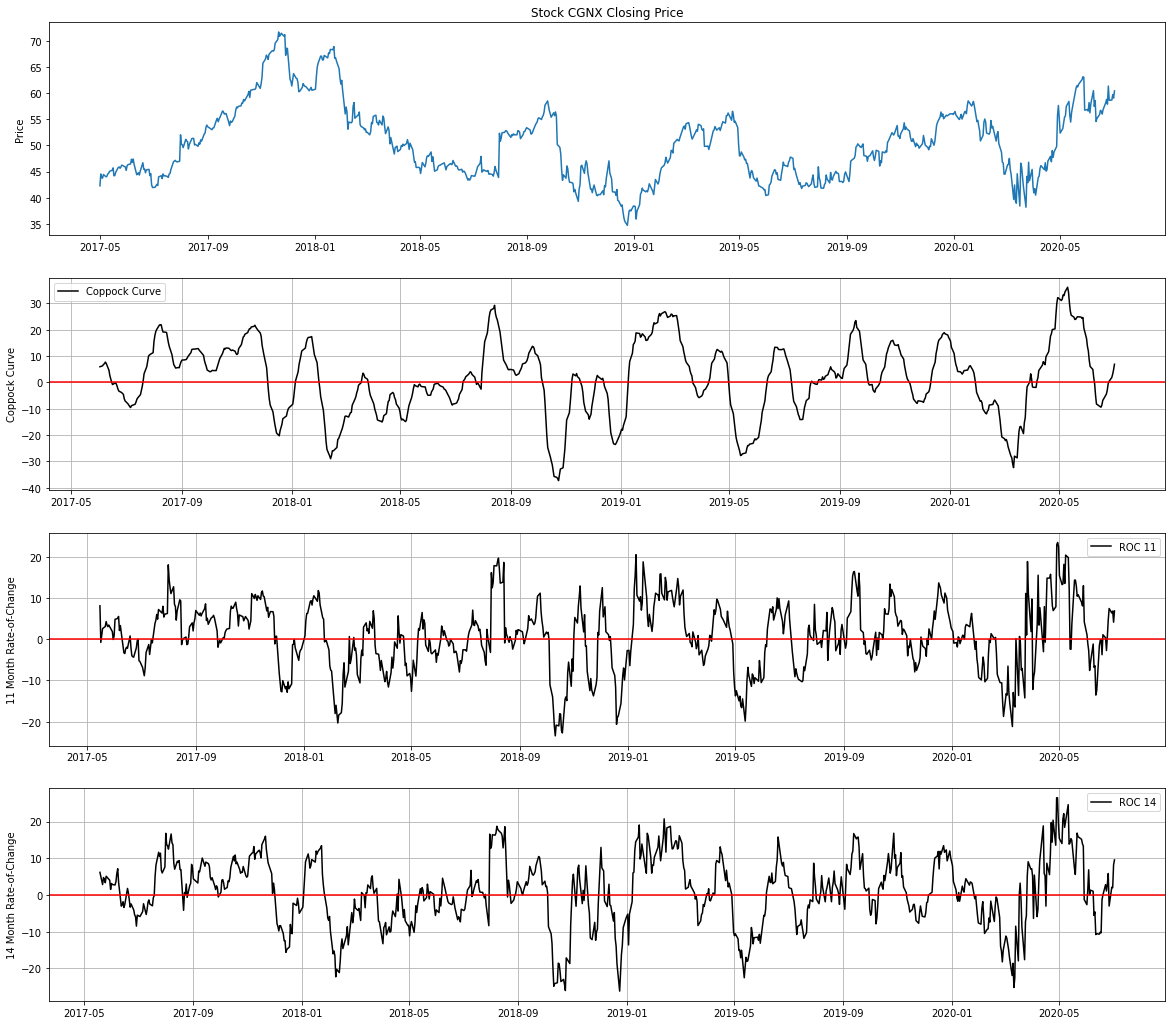

In [ ]:
fig = plt.figure(figsize=(20,18))
ax1 = plt.subplot(4, 1, 1)
ax1.plot(df['Adj_Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(4, 1, 2)
ax2.plot(df['COPP'], label='Coppock Curve', color='black')
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.set_ylabel('Coppock Curve')
ax2.legend(loc='best')

ax3 = plt.subplot(4, 1, 3)
ax3.plot(df['ROC_11'], label='ROC 11', color='black')
ax3.axhline(y=0, color='red')
ax3.grid()
ax3.set_ylabel('11 Month Rate-of-Change')
ax3.legend(loc='best')

ax4 = plt.subplot(4, 1, 4)
ax4.plot(df['ROC_14'], label='ROC 14', color='black')
ax4.axhline(y=0, color='red')
ax4.grid()
ax4.set_ylabel('14 Month Rate-of-Change')
ax4.legend(loc='best');

## Close Location Value (CLV) & ADL

[GitHub](https://github.com/LastAncientOne/Stock_Analysis_For_Quant/blob/master/Python_Stock/Technical_Indicators/CLV.ipynb)

[Investopedia](https://www.investopedia.com/terms/c/close_location_value.asp#:~:text=Close%20location%20value%20is%20a,to%20the%20high%2Dlow%20range.&text=CLV%20readings%20close%20to%20%2D1,to%20zero%20are%20considered%20neutral.)

[Market Volume](https://www.marketvolume.com/technicalanalysis/closelocationvalue.asp)

* Used to measure the location of the price in relation to the highest high and lowest low in a period
* Moves in the range $(-1, 1)$
> * **CLV --> 1** indicates closing price is near its high (**Bullish** sign)
> * **CLV --> -1** reveal the closing price is near its low (**Bearish** sign)
> * **CLV --> 0** are considered **neutral**

* **CLV by itself is not considered to be valuable**
> * CLV is extremely sensitive to random spikes or drops in price
> * **Ignores overnight gaps**
> * Combining CLV with additional technical indicators e.g., **Accumulation/Distribution**, is a robust measure compared to security closing price alone

* However, by itself it can be used to confirm or reject possible divergences
> * **If using alone**, it is suggested to **use an intermediate or long-term period (e.g., 2+ months)**, allowing historical perspective to reduce overreactions to fluctuations

### $CLV = \frac{(Close - Low) - (High - Close)}{(High - Low)}$

## Accumulation/Distribution Line (ADL)
* Assess the flow of money into and out of a financial instrument 
* Looks at (1) trading range and (2) trading volume over (3) a given period
* Indicator based on **derivative of price and volume** - two steps removed from actual price
* **How to use:**
> * Calculate CLV
> * **Money Flow Volume (MFV)** = CLV * Volume for the Period
>> * Negative value = money flowing out
>> * Positive value = money flowing in
> * Calculate this value over multiple periods - this cumulative total gives us our accumulation/distribution index 
>> * ADL = previous ADL value + current MFV

### $ADL = CLV * Volume_n$

In [35]:
# Select period
n = 10

# CLV - Money Flow Multiplier (MFM)
df['CLV_10'] = (((df['Adj_Close'] - df['Low'].rolling(window=n).min()) - \
                 (df['High'].rolling(window=n).max() - df['Adj_Close'])) / (df['High'].rolling(window=n).max() - df['Low'].rolling(window=n).min()))

# Money Flow Volume (MFV) = MFM * Volume for Period
df['AccVolume_10'] = df['Volume'].rolling(n).sum()

# running total of MFV forms the ADL
df['MFV_10'] = df['AccVolume_10'] * df['CLV_10']
df['ADL_10'] = df['MFV_10'].cumsum()

# Select period
n2 = 42

df['CLV_42'] = (((df['Adj_Close'] - df['Low'].rolling(window=n2).min()) - \
                 (df['High'].rolling(window=n2).max() - df['Adj_Close'])) / (df['High'].rolling(window=n2).max() - df['Low'].rolling(window=n2).min()))

# Money Flow Volume (MFV) = MFM * Volume for Period
df['AccVolume_42'] = df['Volume'].rolling(n2).sum()

# running total pf MFV forms the ADL
df['MFV_42'] = df['AccVolume_42'] * df['CLV_42']
df['ADL_42'] = df['MFV_42'].cumsum()

# df = df.drop(['xxxx'],axis=1)

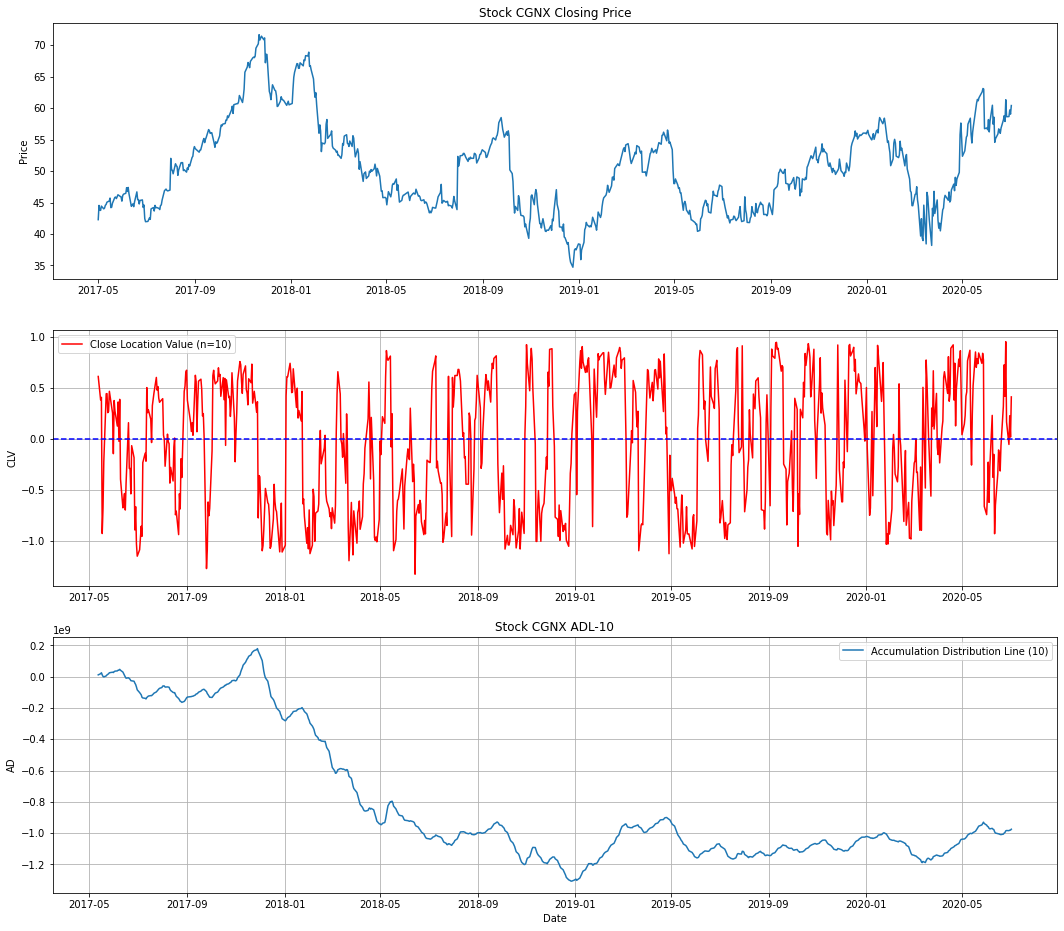

In [ ]:
fig = plt.figure(figsize=(18,16))
ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj_Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['CLV_10'], label='Close Location Value (n=10)', color='red')
ax2.axhline(y=0, color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('CLV')
ax2.legend(loc='best')

ax3 = plt.subplot(3, 1, 3)
ax3.plot(df['ADL_10'], label="Accumulation Distribution Line (10)")
ax3.set_title('Stock '+ symbol +' ADL-10')
ax3.grid()
ax3.set_ylabel('AD')
ax3.legend(loc='best')
ax3.set_xlabel('Date');

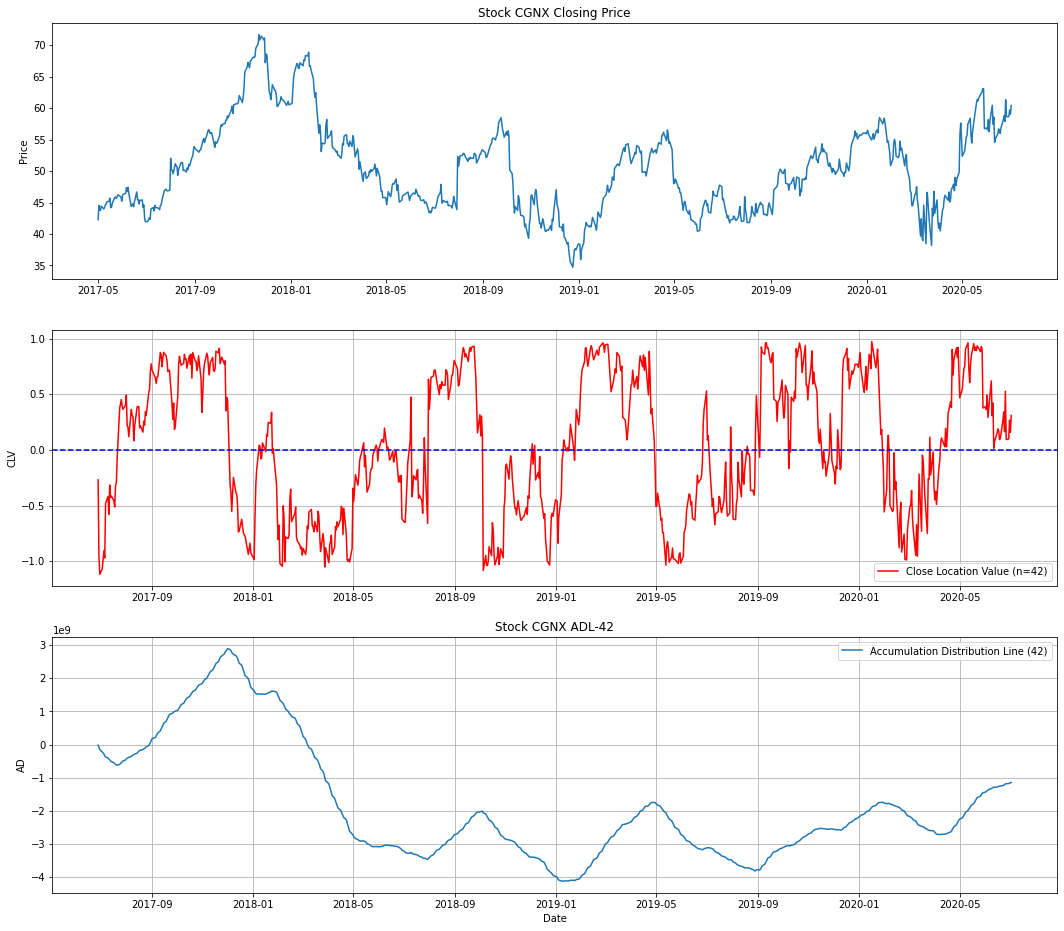

In [ ]:
fig = plt.figure(figsize=(18,16))
ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj_Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['CLV_42'], label='Close Location Value (n=42)', color='red')
ax2.axhline(y=0, color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('CLV')
ax2.legend(loc='best')

ax3 = plt.subplot(3, 1, 3)
ax3.plot(df['ADL_42'], label="Accumulation Distribution Line (42)")
ax3.set_title('Stock '+ symbol +' ADL-42')
ax3.grid()
ax3.set_ylabel('AD')
ax3.legend(loc='best')
ax3.set_xlabel('Date');

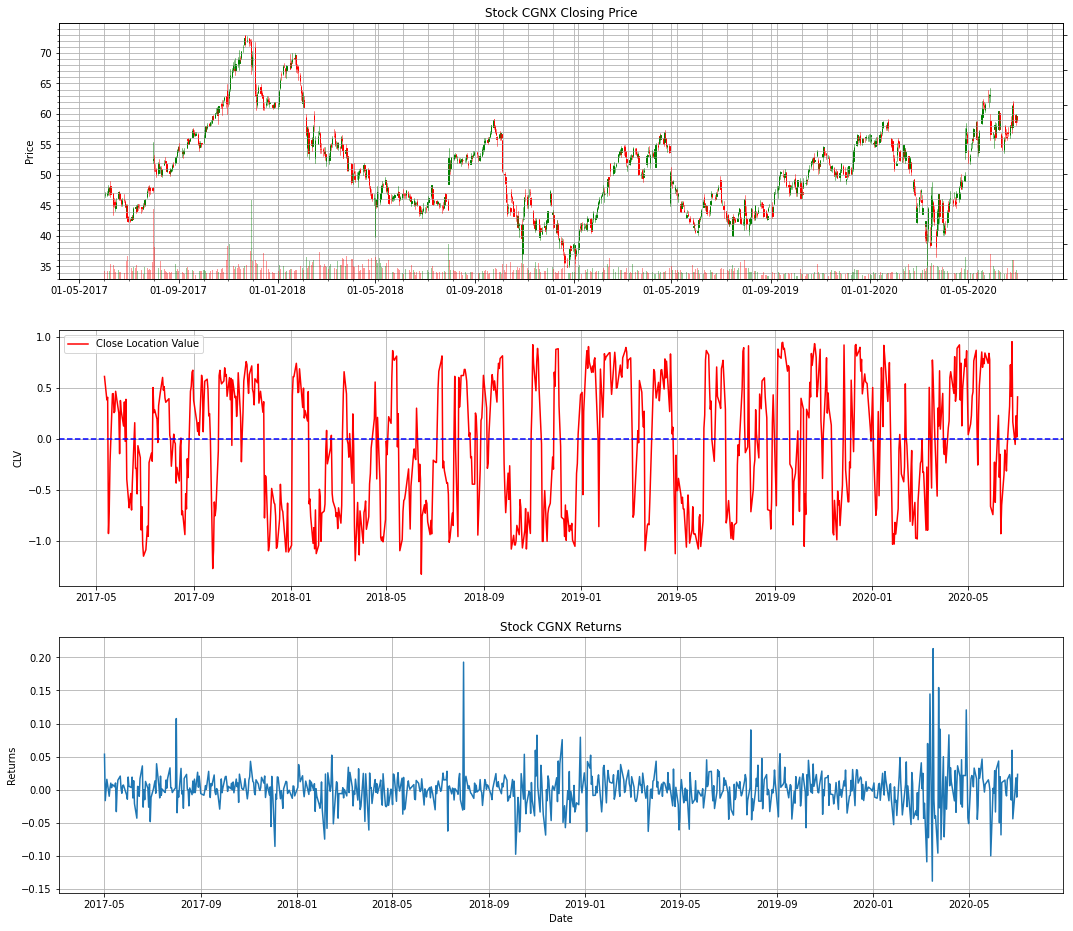

In [ ]:
# Dataframe for Visualization
dfc = df.copy()
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'])

# Candlestick with CCI
fig = plt.figure(figsize=(18,16))

ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['CLV_10'], label='Close Location Value', color='red')
ax2.axhline(y=0, color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('CLV')
ax2.legend(loc='best')

ax3 = plt.subplot(3, 1, 3)
ax3.plot(df['returns'])
ax3.grid()
ax3.set_title('Stock '+ symbol +' Returns')
ax3.set_xlabel('Date')
ax3.set_ylabel('Returns');

## Chaikin Money Flow (CMF) & Oscillator

[GitHub](https://github.com/LastAncientOne/Stock_Analysis_For_Quant/blob/master/Python_Stock/Technical_Indicators/CMF.ipynb)

[Stock Charts](https://school.stockcharts.com/doku.php?id=technical_indicators:chaikin_money_flow_cmf)

[Chaikin Analytics](https://www.chaikinanalytics.com/chaikin-money-flow/)

* Measures the amount of **Money Flow Volume** (MFV) over a specific period
> * This view of trading activity helps identify price movements which are likely to be supportable based on price/volume patterns by looking at two critical factors:
>> * **Has the stock been closing strong during this move?**
>> * **Has the move happened on relatively high or low volume?** 

* MFV forms the basis for the Accumulation/Distribution Line
> * Instead of a cummulative total, CMF sums MFV for a specific look-back period (typically 20-21 days)

* Resulting **indicator fluctuates above/below zero**
> * Chartists weigh balance of buying or selling pressure with the absolute level of CMF
> * Chartists allso look for crosses above or below the zero line to identify changes on money flow

* **Money Flow Persistency** 
> * Significant accumulation over 6-9 months
> * Can be a sign of accumulation/distribution by major institutions
> * This is true even though calculation only looks at price/volume activity

* Short-term **Money Flow Divergence**:
>> * Occurs when a price move is not accompanied by similar change in Money Flow:
>>> * Price rises but Money Flow stays negative
>>> * Price drops but Money Flow stays positive
>> * Can indicate an increased risk of short-term reversal 

* **Signals**
> * **Trends** 
>> * Higher readings (positive or negative) indicate a stronger trend 
>> * Increasing readings indicate gaining momentum
> * **Crosses**
>> * occurs when CMF intersect zero (from above or below)
>> * False signals can occur if crosses are temporary (some traders wait until reading is higher than +0.5 or lower than -0.5)
> * **Divergence**
>> * When a price action lacks a corresponding change in the CMF indicator
>> * **Bearish** = price moves to a new high but the CMF reading does not go higher
>> * **Bullish** = price falls to a new low but the CMF does not follow suit with a lower reading (indicating possible upside reversal is coming)

In [36]:
# Select Period
n = 20

# Multiplier (similar to CVL)
df['MF_Multiplier'] = (2*df['Adj_Close'] - df['Low'] - df['High'])/(df['High']-df['Low'])

# MF Volume
df['MF_Volume'] = df['MF_Multiplier']*df['Volume']

# CMF with rolling volume
df['CMF'] = df['MF_Volume'].rolling(n).sum()/df['Volume'].rolling(n).sum()

# ADL
df['ADL'] = df['MF_Volume'].cumsum()

# Exponential Moving Averages
df['ADL_3_EMA'] = df['ADL'].ewm(ignore_na=False,span=3,min_periods=2,adjust=True).mean()
df['ADL_10_EMA'] = df['ADL'].ewm(ignore_na=False,span=10,min_periods=9,adjust=True).mean()
df['Chaikin_Oscillator'] = df['ADL_3_EMA'] - df['ADL_10_EMA']

df['CMF_Positive'] = df['CMF'] > 0

# drop cols
df = df.drop(['MF_Multiplier','MF_Volume','ADL','ADL_3_EMA','ADL_10_EMA'],axis=1)

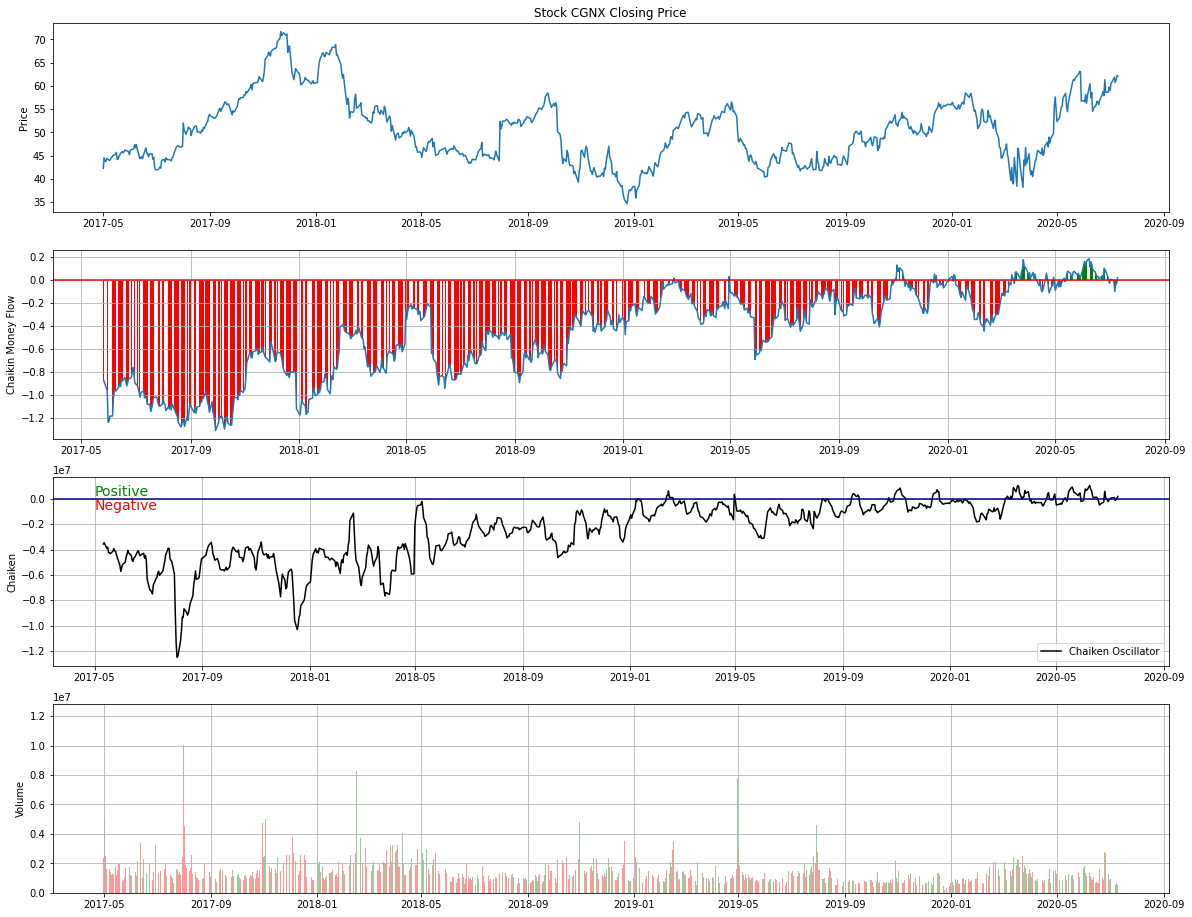

In [ ]:
# Plot Price, Returns, CMF, and Volume
fig = plt.figure(figsize=(20,16))

ax1 = plt.subplot(4, 1, 1)
ax1.plot(df['Adj_Close'], label='Adj Close')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
# ax1.set_xlabel('Date')
# ax1.legend(loc='best')

ax2 = plt.subplot(4, 1, 2)
ax2.plot(df['CMF'])
# df['CMF_Positive'] = df['CMF'] > 0
ax2.bar(df.index, df['CMF'], color=df.CMF_Positive.map({True: 'g', False: 'r'}))
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.set_ylabel('Chaikin Money Flow')

ax3 = plt.subplot(4, 1, 3)
ax3.plot(df['Chaikin_Oscillator'], label='Chaiken Oscillator',color='black')
ax3.axhline(y=0, color='darkblue')
ax3.text(s='Positive', x=df.index[0], y=1, verticalalignment='bottom', fontsize=14, color='green')
ax3.text(s='Negative', x=df.index[0], y=1, verticalalignment='top', fontsize=14, color='red')
ax3.grid(True)
ax3.set_ylabel('Chaiken')
ax3.legend(loc='best')

ax4 = plt.subplot(4, 1, 4)
df['Positive'] = df['Open'] < df['Adj_Close']
colors = df.Positive.map({True: 'g', False: 'r'})
ax4.bar(df.index, df['Volume'], color=colors, alpha=0.4)
ax4.set_ylim([0, 1.05*df.Volume.max()])
ax4.set_ylabel('Volume')
ax4.grid(True);

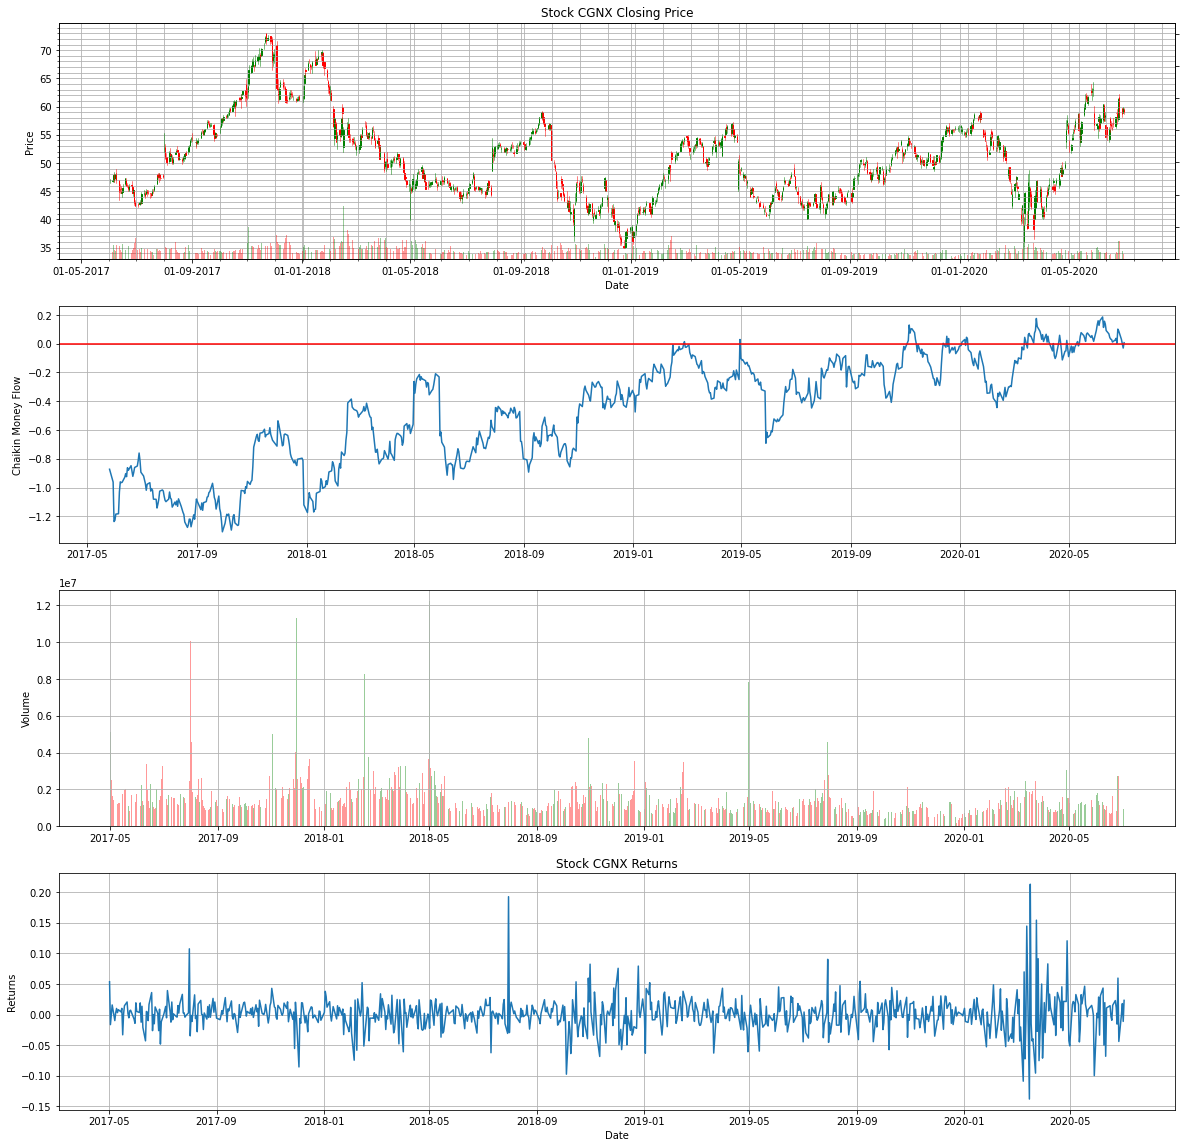

In [ ]:
# Dataframe for Visualization
dfc = df.copy()
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'])

# Candlestick with CCI
fig = plt.figure(figsize=(20,20))

ax1 = plt.subplot(4, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(4, 1, 2)
ax2.plot(df['CMF'])
#df['Positive'] = df['CMF'] > 0
#ax2.bar(df.index, df['CMF'], color=df.Positive.map({True: 'g', False: 'r'}))
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.set_ylabel('Chaikin Money Flow')

ax3 = plt.subplot(4, 1, 3)
df['Positive'] = df['Open'] < df['Adj_Close']
colors = df.Positive.map({True: 'g', False: 'r'})
ax3.bar(df.index, df['Volume'], color=colors, alpha=0.4)
ax3.set_ylim([0, 1.05*df.Volume.max()])
ax3.set_ylabel('Volume')
ax3.grid(True)

ax4 = plt.subplot(4, 1, 4)
ax4.plot(df['returns'])
ax4.grid(True)
ax4.set_title('Stock '+ symbol +' Returns')
ax4.set_xlabel('Date')
ax4.set_ylabel('Returns');

## Detrend Price Oscillator

[Stock Charts](https://school.stockcharts.com/doku.php?id=technical_indicators:detrended_price_osci)

[Investopedia](https://www.investopedia.com/terms/d/detrended-price-oscillator-dpo.asp#:~:text=A%20detrended%20price%20oscillator%20is,is%20not%20a%20momentum%20indicator.)

* An oscillator that **minimizes short-term price movements** in estimating the trend of an asset
> * **Measures the the length of price cycles** from peak to peak or trough to trough
> * Not a momentum or overbought/sold oscillator 
* Measures the **difference between a past price** and a **moving average**
> * Indicator typically set to **look back over 20 to 30 periods**
> * Used for **Market Indices**, **Individual Stocks**, **Commodities**, and **Currency**

In [37]:
n = 21

df['DPO_Stock'] = df['Adj_Close'].shift(int((0.5 * n) + 1)) - df['Adj_Close'].rolling(n).mean()
df['DPO_GSPC'] = mk_gspc['Adj_Close'].shift(int((0.5 * n) + 1)) - mk_gspc['Adj_Close'].rolling(n).mean()
df['DPO_DOW'] = mk_dow['Adj_Close'].shift(int((0.5 * n) + 1)) - mk_dow['Adj_Close'].rolling(n).mean()
df['DPO_VIX'] = mk_vix['Adj_Close'].shift(int((0.5 * n) + 1)) - mk_vix['Adj_Close'].rolling(n).mean()
df['DPO_IXIC'] = mk_ixic['Adj_Close'].shift(int((0.5 * n) + 1)) - mk_ixic['Adj_Close'].rolling(n).mean()

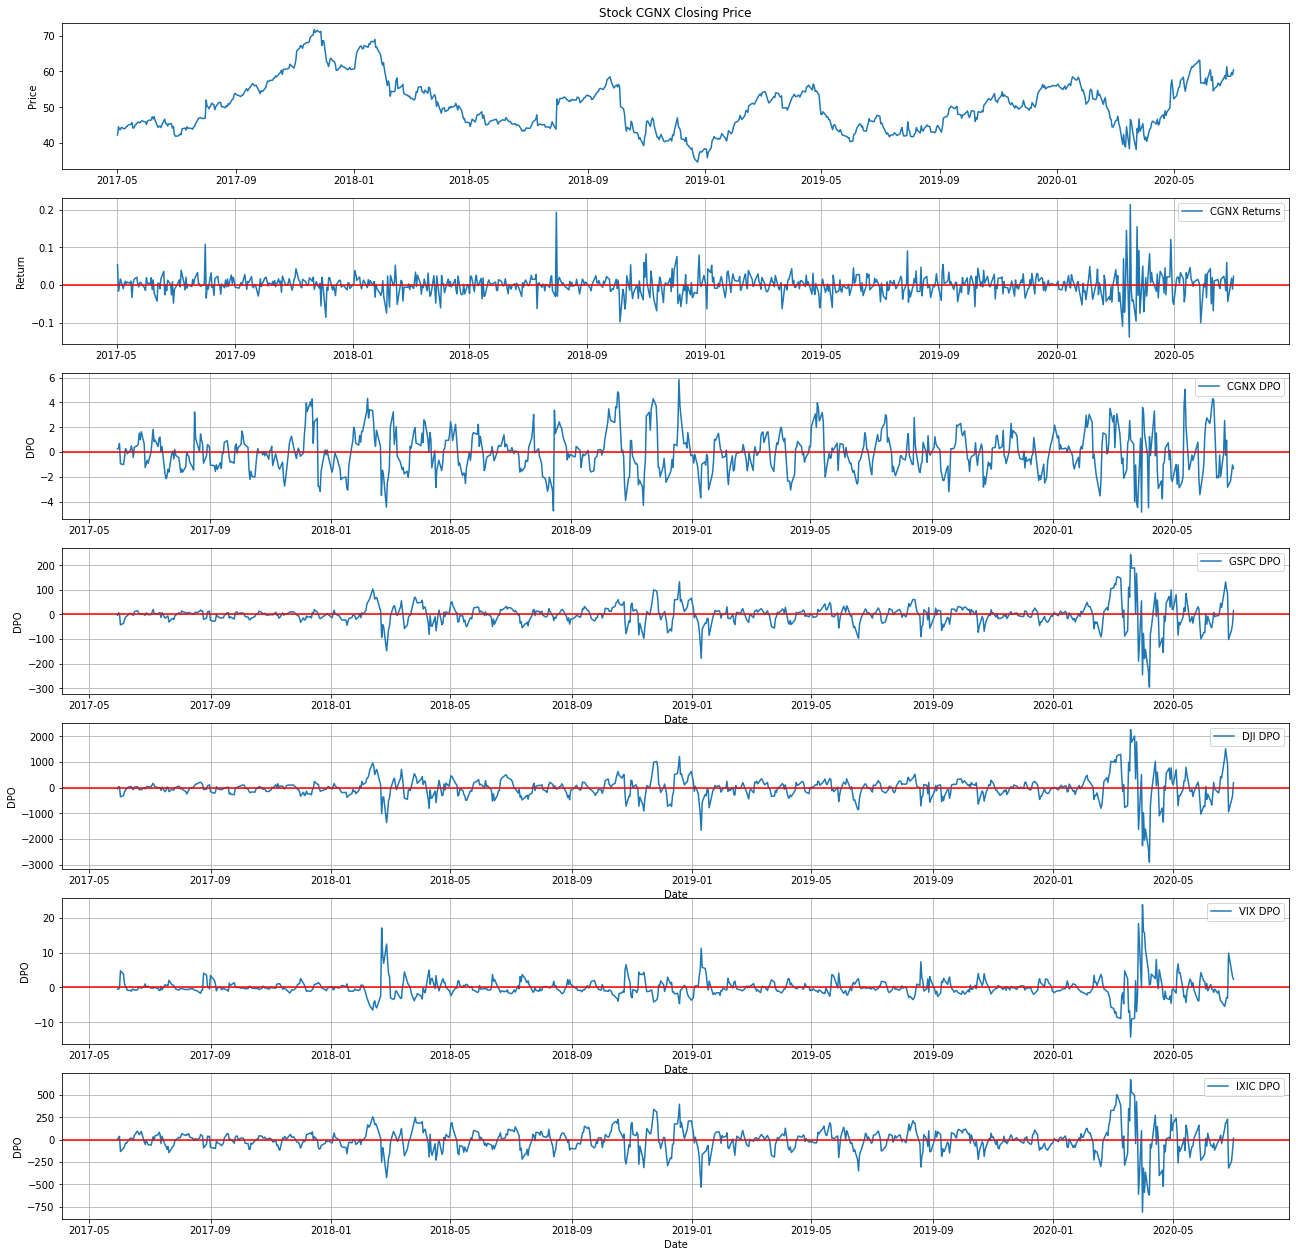

In [ ]:
fig = plt.figure(figsize=(22,22))

# CGNX - Closing Price
ax1 = plt.subplot(7, 1, 1)
ax1.plot(df['Adj_Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

# CGNX - Returns 
ax2 = plt.subplot(7, 1, 2)
ax2.plot(df['returns'], label='CGNX Returns')
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.set_ylabel('Return')
ax2.legend(loc='best')

# CGNX - DPO 
ax3 = plt.subplot(7, 1, 3)
ax3.plot(df['DPO_Stock'], label='CGNX DPO')
ax3.axhline(y=0, color='red')
ax3.grid()
ax3.set_ylabel('DPO')
ax3.legend(loc='best')

# GSPC - DPO
ax4 = plt.subplot(7, 1, 4)
ax4.plot(df['DPO_GSPC'], label='GSPC DPO')
ax4.axhline(y=0, color='red')
ax4.grid()
ax4.set_ylabel('DPO')
ax4.set_xlabel('Date')
ax4.legend(loc='best')

# DJI - DPO
ax5 = plt.subplot(7, 1, 5)
ax5.plot(df['DPO_DOW'], label='DJI DPO')
ax5.axhline(y=0, color='red')
ax5.grid()
ax5.set_ylabel('DPO')
ax5.set_xlabel('Date')
ax5.legend(loc='best')

# VIX - DPO
ax6 = plt.subplot(7, 1, 6)
ax6.plot(df['DPO_VIX'], label='VIX DPO')
ax6.axhline(y=0, color='red')
ax6.grid()
ax6.set_ylabel('DPO')
ax6.set_xlabel('Date')
ax6.legend(loc='best')

# IXIC - DPO
ax7 = plt.subplot(7, 1, 7)
ax7.plot(df['DPO_IXIC'], label='IXIC DPO')
ax7.axhline(y=0, color='red')
ax7.grid()
ax7.set_ylabel('DPO')
ax7.legend(loc='best')
ax7.set_xlabel('Date');

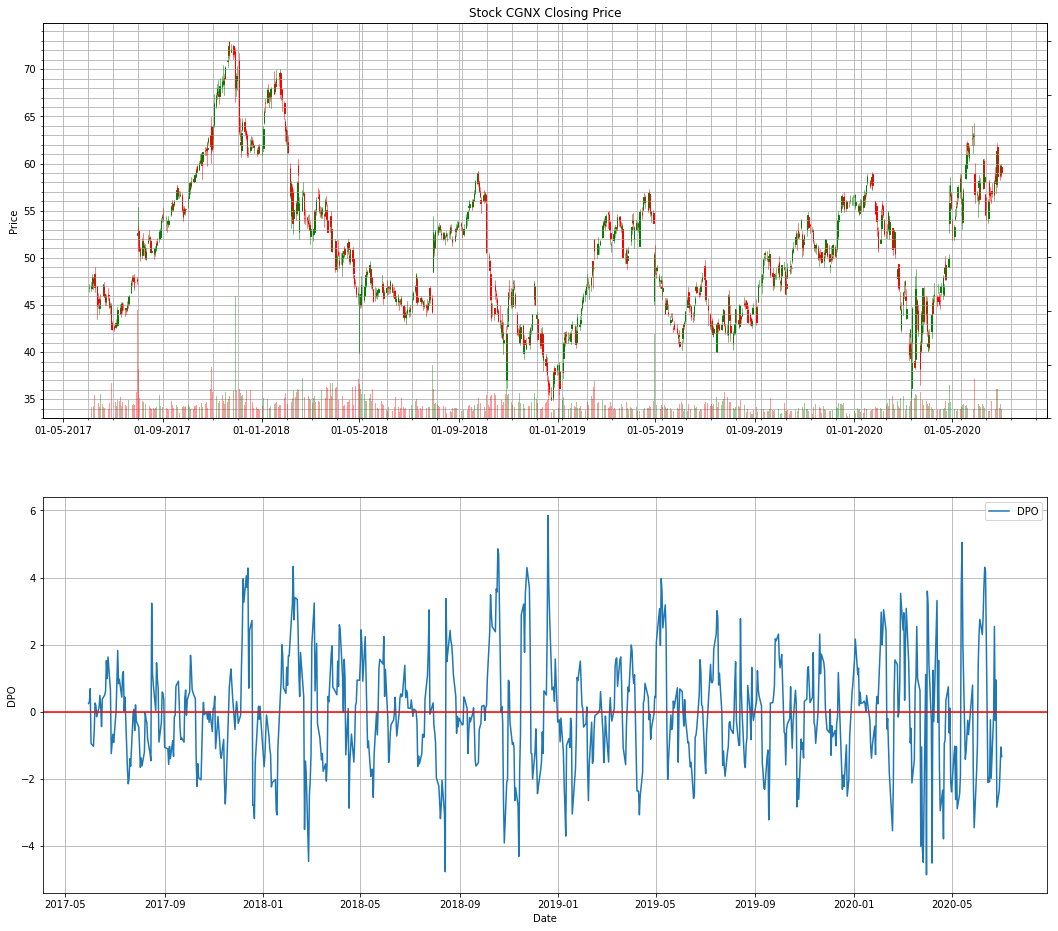

In [ ]:
# Dataframe for Visualization
dfc = df.copy()
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'])

# Candlestick with ADX
fig = plt.figure(figsize=(18,16))

ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['DPO_Stock'], label='DPO')
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.set_ylabel('DPO')
ax2.set_xlabel('Date')
ax2.legend(loc='best');

## Average Directional Index (ADX)

[GitHub](https://github.com/LastAncientOne/Stock_Analysis_For_Quant/blob/master/Python_Stock/Technical_Indicators/ADX.ipynb)

[Stock Charts](https://school.stockcharts.com/doku.php?id=technical_indicators:average_directional_index_adx)

[Investopedia](https://www.investopedia.com/terms/d/dmi.asp#:~:text=The%20Directional%20Movement%20Index%2C%20or,of%20an%20asset%20is%20moving.&text=If%20%2DDI%20is%20above%20%2BDI,traders%20assess%20the%20trend%20direction.)

* **ADX** determines the **strength of a trend** --> $[0,100]$
> * *Does not indicate the direction of the trends* 

* **Directional Movement Index** (DX or DMX) identifies the **direction** the price is moving
>> ## $DX = \frac{| (+DI_{14}) | - | (-DI_{14})|} {(+DI_{14}) + (-DI_{14})}$

* **Plus Directional Indicator** (+DI) and **Minus Directional Indicator** (-DI) define **directional movement**
> * *Also referred to as* ***Directional Movement Indicators (DMI)***
> * Directional movement is **positive** when: $(High_t - High_{t-1}) > (Low_{t-1} - Low_t)$
>> * **+DM** = $High_t - High_{t-1}$
> * Directional movement is **negative** when: $(Low_{t-1} - Low_t) > (High_t - High_{t-1})$
>> * **-DM** = $Low_{t-1} - Low_t$
> * **Price** is **moving up** when: **(+DI)** is **greater** than (-DI)
> * **Price** is **moving down** --> **(-DI)** is **greater** than (+DI)

* ADX is derived from the smoothed averages of the difference between +DI and -DI
> * **ADX > 25** --> **strong trend** present
> * **ADX < 20** --> **no trend** present




In [38]:
# ADX
df['ADX'] = ta.ADX(df['High'], df['Low'],df['Adj_Close'], timeperiod=14)

# +/-DM
df['Plus_DI'] = ta.PLUS_DI(df['High'], df['Low'],df['Adj_Close'], timeperiod=14)
df['Minus_DI'] = ta.MINUS_DI(df['High'], df['Low'],df['Adj_Close'], timeperiod=14)

# Directional Movement Index (DX)
df['DX'] = ta.DX(df['High'], df['Low'],df['Adj_Close'], timeperiod=14)

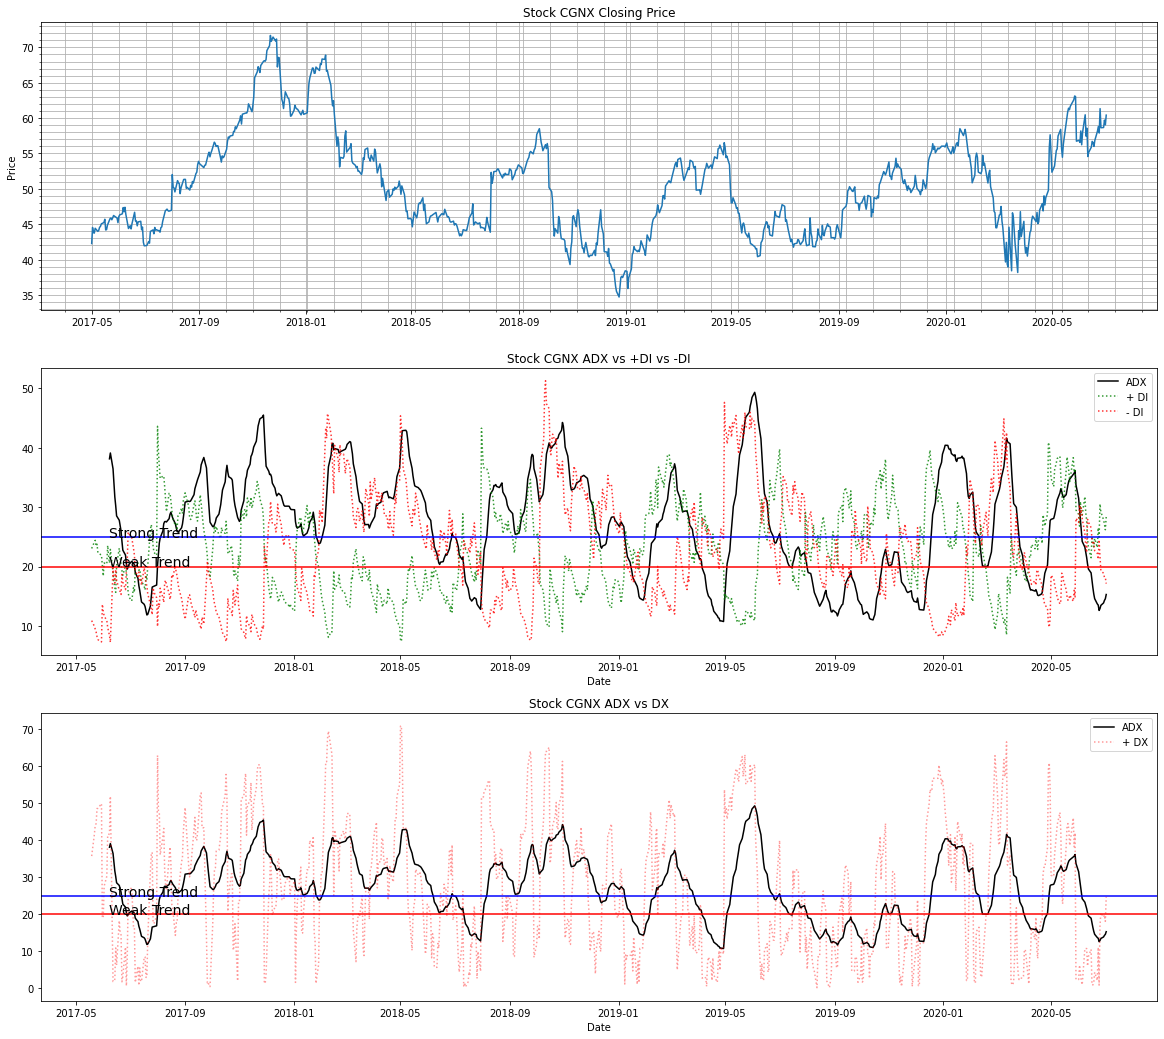

In [ ]:
# Line Chart
fig = plt.figure(figsize=(20,18))

ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj_Close'])
ax1.grid(True, which='both')
# ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
# ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.minorticks_on()
# ax1.legend(loc='best')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

# create series data for visualization
adx = ta.ADX(df['High'], df['Low'],df['Adj_Close'], timeperiod=14)
adx = adx.dropna()
dx = ta.DX(df['High'], df['Low'],df['Adj_Close'], timeperiod=14)
dx = dx.dropna()
pdi = ta.PLUS_DI(df['High'], df['Low'],df['Adj_Close'], timeperiod=14)
pdi = pdi.dropna()
mdi = ta.MINUS_DI(df['High'], df['Low'],df['Adj_Close'], timeperiod=14)
mdi = mdi.dropna()

ax2 = plt.subplot(3, 1, 2)
ax2.plot(adx, '-', label='ADX', color='k')
ax2.plot(pdi, ':', label='+ DI', color='g', alpha=0.8)
ax2.plot(mdi, ':', label='- DI', color='r', alpha=0.8)
ax2.text(s='Strong Trend', x=adx.index[0], y=25, fontsize=14)
ax2.text(s='Weak Trend', x=adx.index[0], y=20, fontsize=14)
ax2.axhline(y=25,color='b')
ax2.axhline(y=20,color='r')
ax2.set_title('Stock '+ symbol +' ADX vs +DI vs -DI')
ax2.set_xlabel('Date')
ax2.legend(loc='best');

ax3 = plt.subplot(3, 1, 3)
ax3.plot(adx, '-', label='ADX', color='k')
ax3.plot(dx, ':', label='+ DX', color='r', alpha=0.4)
ax3.text(s='Strong Trend', x=adx.index[0], y=25, fontsize=14)
ax3.text(s='Weak Trend', x=adx.index[0], y=20, fontsize=14)
ax3.axhline(y=25,color='b')
ax3.axhline(y=20,color='r')
ax3.set_title('Stock '+ symbol +' ADX vs DX')
ax3.set_xlabel('Date')
ax3.legend(loc='best');

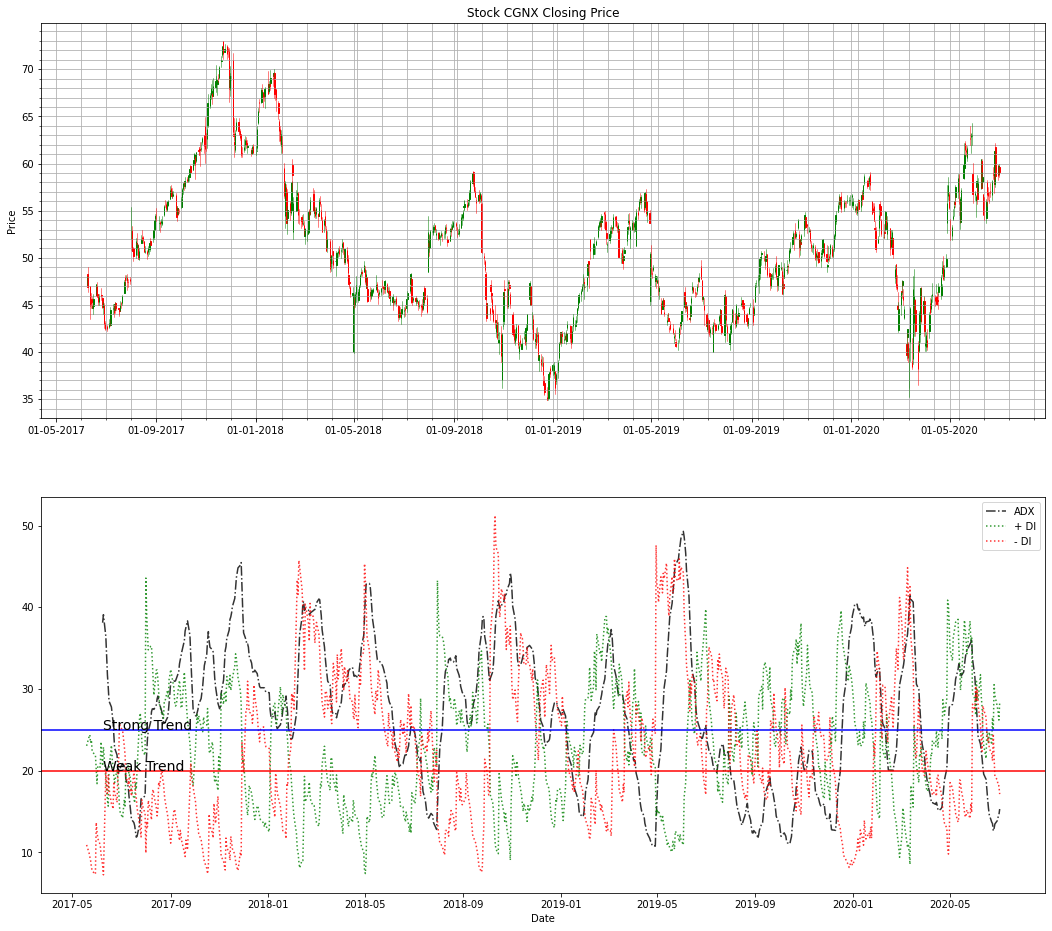

In [ ]:
# Dataframe for Visualization
dfc = df.copy()
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'])

# Candlestick with ADX
fig = plt.figure(figsize=(18,16))

ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.minorticks_on()
#ax1.legend(loc='best')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(adx, '-.', label='ADX', color='k', alpha=0.8)
ax2.plot(pdi, ':', label='+ DI', color='g', alpha=0.8)
ax2.plot(mdi, ':', label='- DI', color='r', alpha=0.8)
ax2.text(s='Strong Trend', x=adx.index[0], y=25, fontsize=14)
ax2.text(s='Weak Trend', x=adx.index[0], y=20, fontsize=14)
ax2.axhline(y=25,color='b')
ax2.axhline(y=20,color='r')
ax2.set_xlabel('Date')
ax2.legend(loc='best');

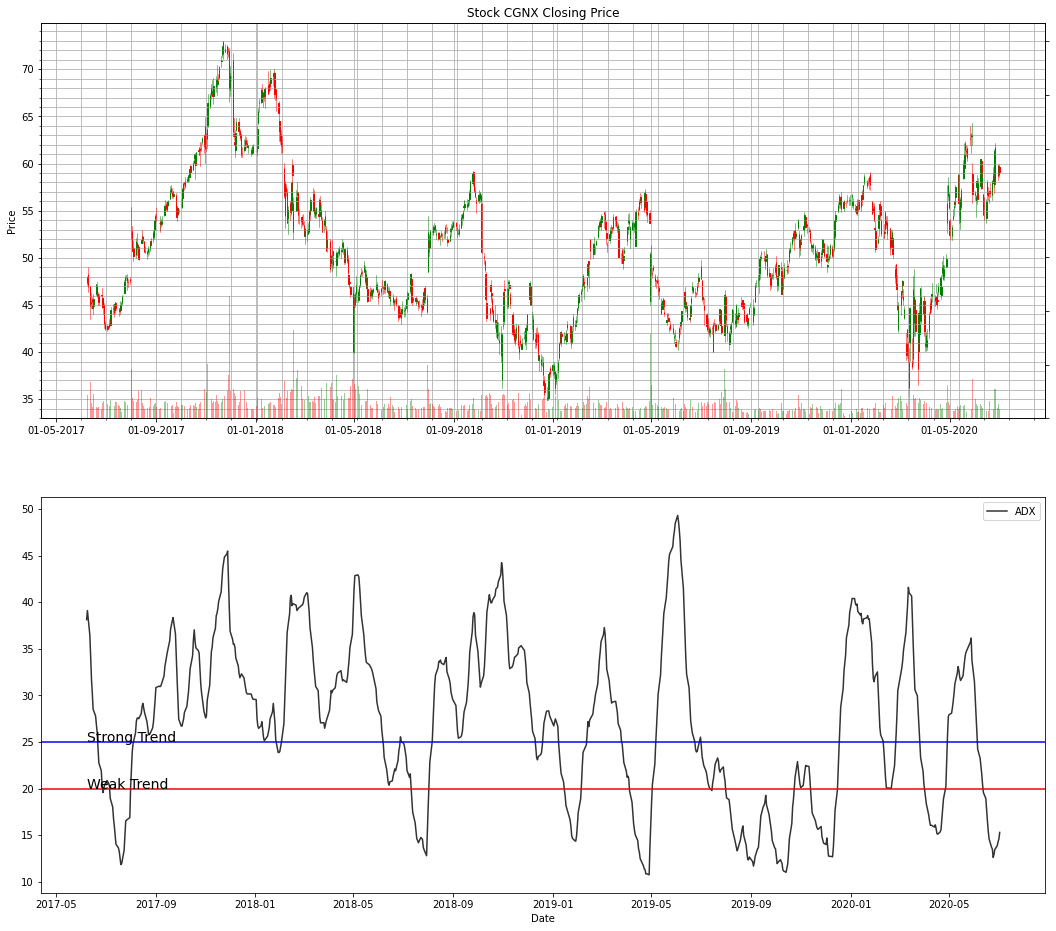

In [ ]:
# Candlestick with ADX
fig = plt.figure(figsize=(18,16))

ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj_Close']
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(adx, '-', label='ADX', color='k', alpha=0.8)
ax2.text(s='Strong Trend', x=adx.index[0], y=25, fontsize=14)
ax2.text(s='Weak Trend', x=adx.index[0], y=20, fontsize=14)
ax2.axhline(y=25,color='b')
ax2.axhline(y=20,color='r')
ax2.set_xlabel('Date')
ax2.legend(loc='best');

## Dynamic Momentum Index (DMI)

### ***TODO: Fix DMI Calculation***

* This calculation uses **different time periods as volatility changes**, typically between 5 and 30
* The indicator can be used to generate trade signals in the direction of the trend 
> * Uses **fewer periods** when volatility is **high**
> * Uses **more periods** when volatility is **low**
* **Oversold vs Overbought**
> * Oversold = **DMI < 30**
>> * **Buy Signal** --> when price moves out of oversold territory 
>> * Oversold doesn't necessarily mean it is time to buy
> * Overbought = **DMI > 70**
>> * **Short Signal** --> when price moves out of overbought territory
>> * Overbought doesn't necessarily mean it is time to sell

* **Using the DMI**
> * During an uptrend, traders watch for the indicator to fall below 30 and rise back above in order to trigger a long trade
> * During a downtrend, watch for the indicator to rise above 70 and then fall below it in order to rigger a short trade
> * Looks at past price movement - it is not inherently predictive in nature


In [ ]:
# df['sd'] = df['Adj_Close'].rolling(5).std()
# df['asd'] = df['sd'].rolling(10).mean()
# df['DMI'] = 14/(df['sd']/df['asd'])
# df = df.drop(['sd', 'asd'], axis=1)

# print("DMI Min:", df['DMI'].min())
# print("DMI Max:", df['DMI'].max())
# print("DMI Avg:", df['DMI'].mean())

DMI Min: 3.1021530108021755
DMI Max: 145.96604540857754
DMI Avg: 18.257686290089097


In [39]:
# Calculate dynamic periods for RS
df['Std'] = df['Adj_Close'].rolling(5).std()
df['StdA'] = df['Std'].rolling(10).mean()
df['Vi'] = df['Std'] / df['StdA']
df['Vi'] = df['Vi'].fillna(0)
df['TdInt'] = 14/df['Vi'].astype(int) # return integer for timeperiods
df['TD'] = np.where(df.TdInt > 30, 30, (np.where(df.TdInt < 5, 5, df.TdInt)))
df['TD'] = df['TD'].astype(int)
# Calaculate RS
change = df['Adj_Close'].diff(1)
df['Gain'] = change.mask(change < 0, 0)
df['Loss'] = abs(change.mask(change > 0, 0))

print("TD Min:", df['TD'].min())
print("TD Max:", df['TD'].max())
print("TD Avg:", df['TD'].mean())

TD Min: 5
TD Max: 30
TD Avg: 22.467080745341615


In [42]:
def dynamic(window, series):
  # start_index = x.name 
  s = pd.Series([df.loc[d - pd.offsets.DateOffset(days=window):d, 'Val'] for d in df.index])
  window_subseries = series.iloc[start_index - window +1:start_index +1]

  return window_subseries.mean()

# df['AVG_Gain'] = df.apply(lambda x: dynamic(x['TD'], df['Gain']), axis=1)
# df['AVG_Loss'] = df.apply(lambda x: dynamic(x['TD'], df['Loss']), axis=1)

df['AVG_Gain'] = df.TD.apply(lambda x: dynamic(x, df['Gain']))
df['AVG_Loss'] = df.TD.apply(lambda x: dynamic(x, df['Loss']))

# freq = 'D'
# def dynamic_gain(x):
#   # start = x.index
#   ser = df.Gain.iloc[df.Gain.index - pd.Timedelta(x + 1, unit=freq): df.Gain.index + pd.Timedelta(1, unit='freq')]
#   return ser.mean()

# def dynamic_loss(x):
#   # start = x.index
#   ser = df.Loss.iloc[df.Loss.index - pd.Timedelta(x + 1, unit=freq): df.Loss + pd.Timedelta(1, unit='freq')]
#   return ser.mean()

# df['AVG_Gain'] = df.TD.apply(dynamic_gain)
# df['AVG_Loss'] = df.TD.apply(dynamic_loss)

AttributeError: ignored

In [ ]:
def roll(df, col, periods=[]):
  
  for i in periods:
    rolling_avg = df.rollapply(i, lambda x : ())

df['AVG_Gain'] = df.apply(lambda row: gain(row['TD']), axis=1)
df['AVG_Loss'] = df.apply(lambda row: loss(row['TD']), axis=1)

ValueError: ignored

In [ ]:
# dynamic rolling function, apply to rows
def f_Gain(n):
  x_new = df.Gain.rolling(n).mean()
  return x_new

def f_Loss(n):
  x_new = df.Loss.rolling(n).mean()
  return x_new

df['AVG_Gain'] = df.apply(lambda row : f_Gain(row['TD']), axis=1)
df['AVG_Loss'] = df.apply(lambda row : f_Loss(row['TD']), axis=1)

# df['AVG_Gain'] = df.apply(lambda row : f(row['TD'], row['Gain']), axis=1)
# df['AVG_Loss'] = df.apply(lambda row : f(row['TD'], row['Loss']), axis=1)

df['RS'] = df['AVG_Gain']/df['AVG_Loss']
df['DynamicMoment'] = 100 - (100/(1+df['RS']))

print("TD Min:", df['TD'].min())
print("TD Max:", df['TD'].max())
print("TD Avg:", df['TD'].mean())

ValueError: ignored

In [ ]:
df.head(50)

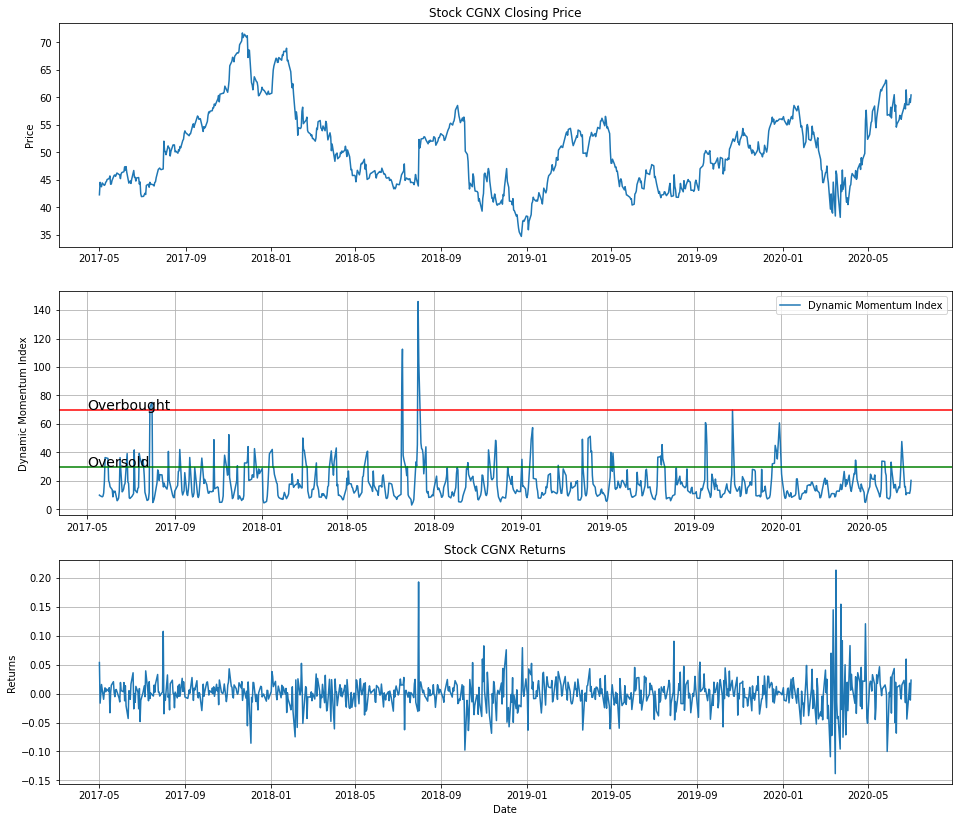

In [ ]:
fig = plt.figure(figsize=(16,14))
ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj_Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['DMI'], label='Dynamic Momentum Index')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Dynamic Momentum Index')
ax2.text(s='Overbought', x=df['DMI'].index[0], y=70, fontsize=14)
ax2.text(s='Oversold', x=df['DMI'].index[0], y=30, fontsize=14)
ax2.axhline(y=70,color='r')
ax2.axhline(y=30,color='g')
# ax2.set_xlabel('Date')

ax4 = plt.subplot(3, 1, 3)
ax4.plot(df['returns'])
ax4.grid(True)
ax4.set_title('Stock '+ symbol +' Returns')
ax4.set_xlabel('Date')
ax4.set_ylabel('Returns');

## RSI (Relative Strength Index)

* Momentum indicator that measures the **magnitude of recent price changes** to evaluate **overbought** and **oversold** 
> * **Overbought** = RSI > ~70
>> * *Note: an overbought reading on RSI during a downtrend is likely lower than 70%*
> * **Undersold** = RSI < ~30
>> * *Note: an oversold RSI reading on and uptrend is likely much higher than 30%*

In [ ]:
df['RSI'] = ta.RSI(df['Adj_Close'], timeperiod=14)

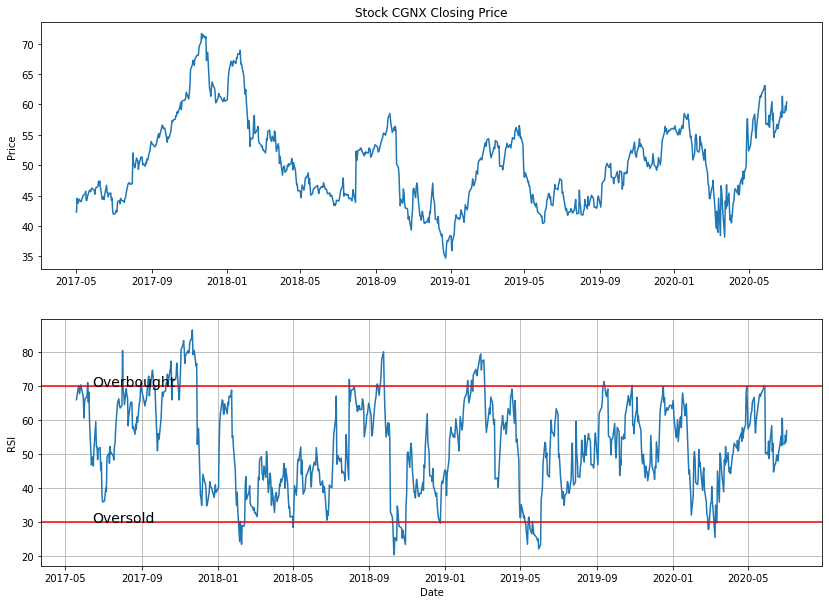

In [ ]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj_Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RSI'], label='Relative Strengths Index')
ax2.text(s='Overbought', x=df.RSI.index[30], y=70, fontsize=14)
ax2.text(s='Oversold', x=df.RSI.index[30], y=30, fontsize=14)
ax2.axhline(y=70, color='red')
ax2.axhline(y=30, color='red')
ax2.grid()
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date');

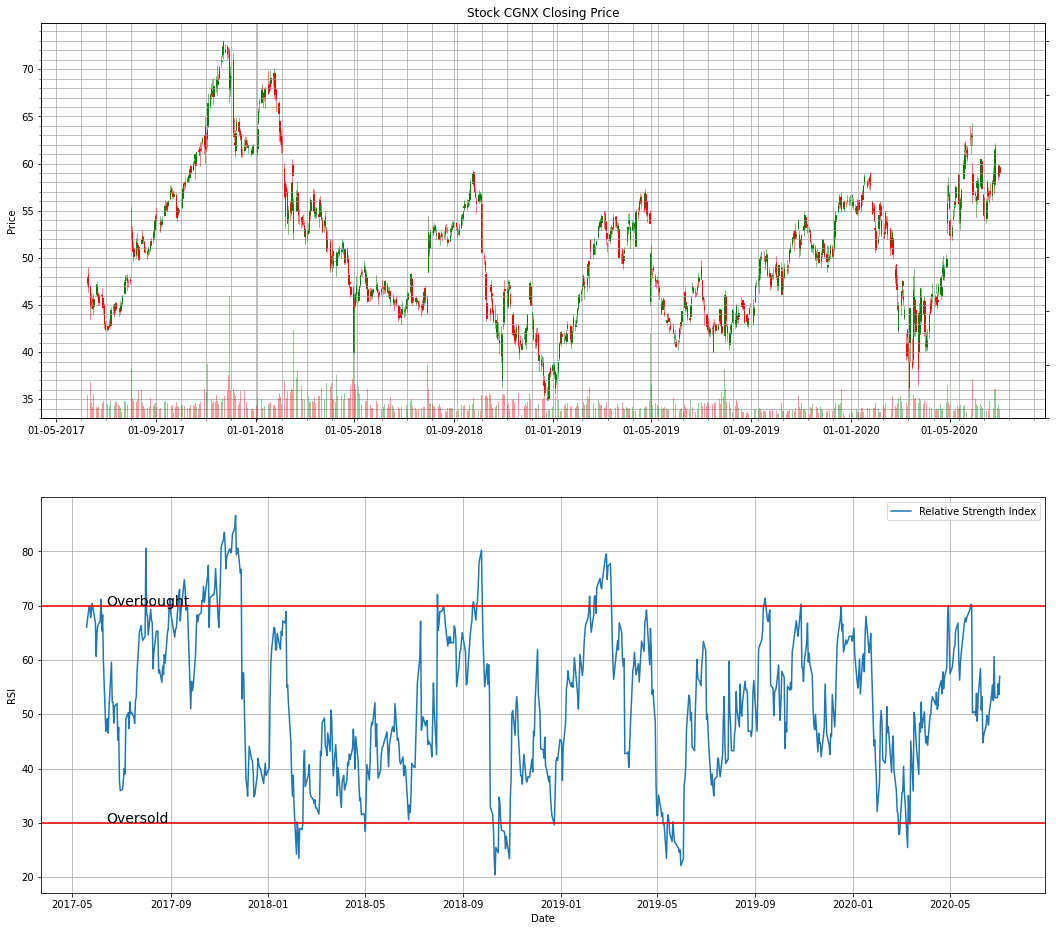

In [ ]:
# Dataframe for Visualization
dfc = df.copy()
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'])

# Candlestick with ADX
fig = plt.figure(figsize=(18,16))

ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RSI'], label='Relative Strength Index')
ax2.text(s='Overbought', x=df.RSI.index[30], y=70, fontsize=14)
ax2.text(s='Oversold', x=df.RSI.index[30], y=30, fontsize=14)
ax2.axhline(y=70, color='red')
ax2.axhline(y=30, color='red')
ax2.grid()
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend(loc='best');

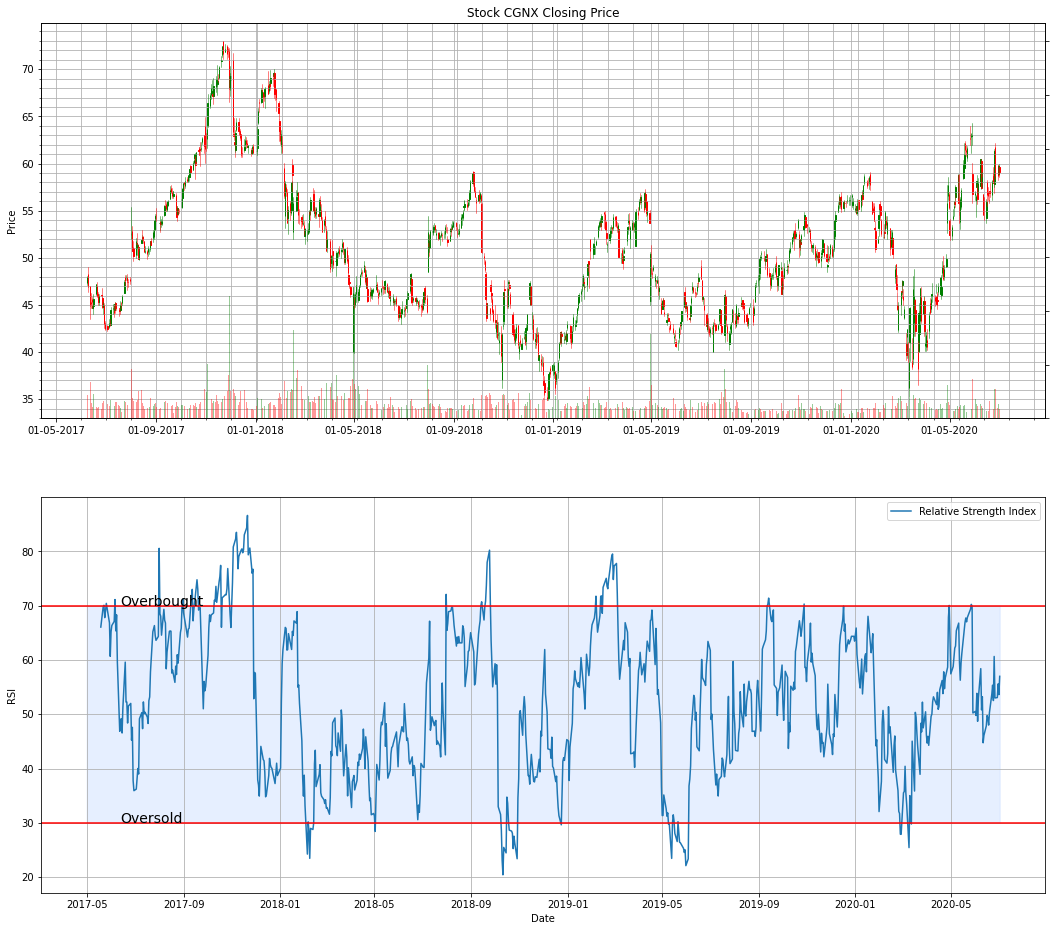

In [ ]:
# Candlestick with ADX
fig = plt.figure(figsize=(18,16))

ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RSI'], label='Relative Strength Index')
ax2.text(s='Overbought', x=df.RSI.index[30], y=70, fontsize=14)
ax2.text(s='Oversold', x=df.RSI.index[30], y=30, fontsize=14)
ax2.fill_between(df.index, y1=30, y2=70, color='#adccff', alpha=0.3)
ax2.axhline(y=70, color='red')
ax2.axhline(y=30, color='red')
ax2.grid()
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend(loc='best');

## MACD (Moving Average Convergence Divergence

[Finance Train](https://financetrain.com/predict-stock-trends-using-macd/)
* Used to predict broad direction or state of market
* The difference between the MACD fast and slow lines is the **signal line**
* **Understand the signals:**
> * When MACD is **positive and increasing** --> short-term price is rising more than long-term rate 
>> * Stock is **ataining momentum**
> * MACD is **negative** when 12 day EMA(MA) is lower than the 26 day EMA(MA) and the **trajectory is downward**
> * **Crossover**
>> * **Signal Line Cross** --> MACD cross the Signal Line (9 day EMA of MACD) **from below and moves above** (***Bullish Signal***)
>> * Center Line Crossover --> Bullish crossover of centerline
> * **Technical Divergence**  --> When MACD moves higher or lower and **stock prices fail to move**

In [ ]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Adj_Close'], fastperiod=12, slowperiod=26, signalperiod=9)

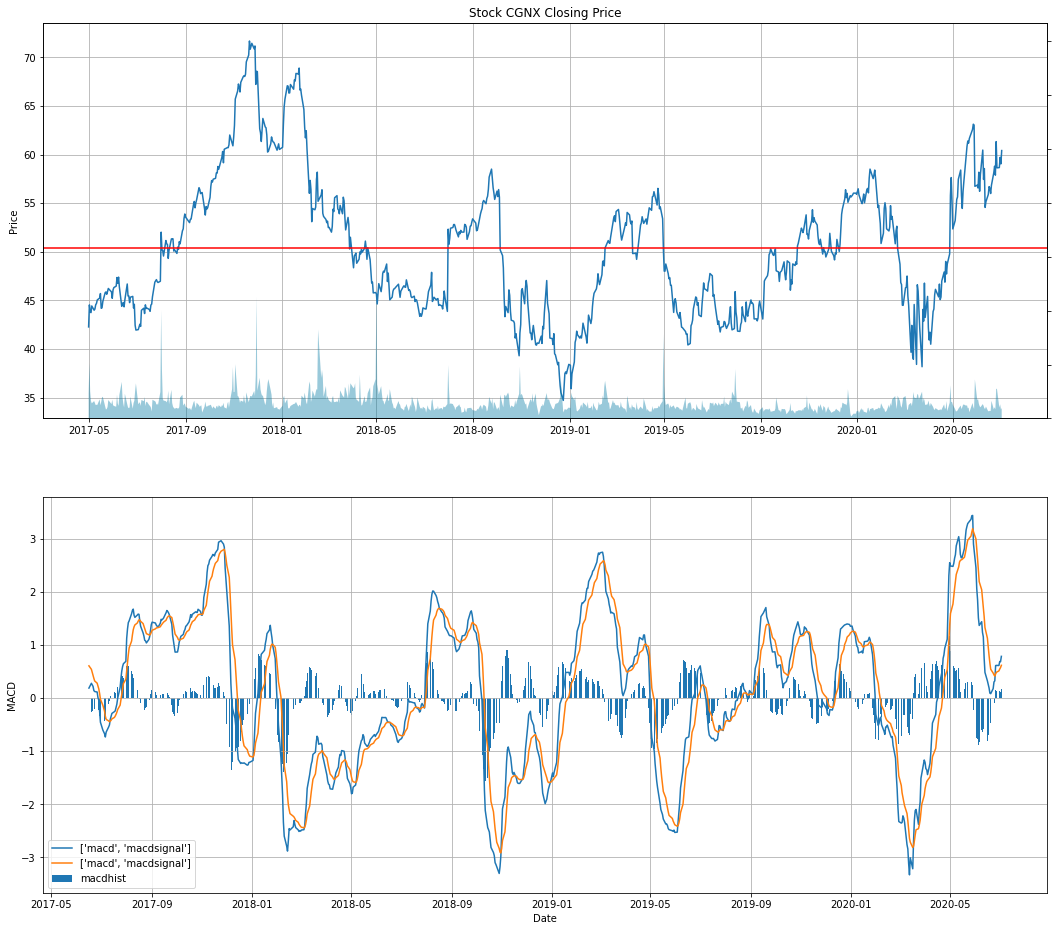

In [ ]:
# Line Chart
fig = plt.figure(figsize=(18,16))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj_Close'])
ax1.axhline(y=df['Adj_Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
#ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df[['macd','macdsignal']], label=labels) 
ax2.bar(df.index, df['macdhist'], label='macdhist')
ax2.grid()
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best');

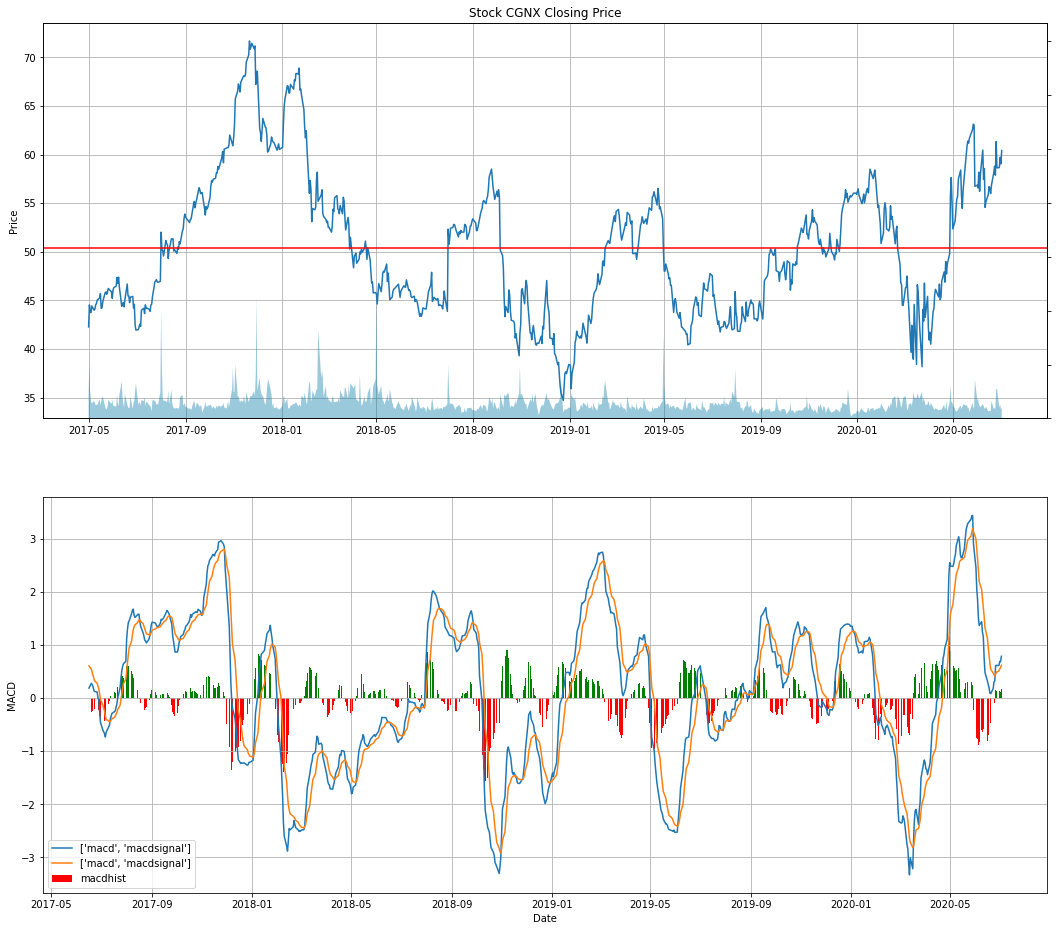

In [ ]:
# Line Chart
fig = plt.figure(figsize=(18,16))

ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj_Close'])
ax1.axhline(y=df['Adj_Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
#ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
df['positive'] = df['macdhist'] > 0
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], color=df.positive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best');

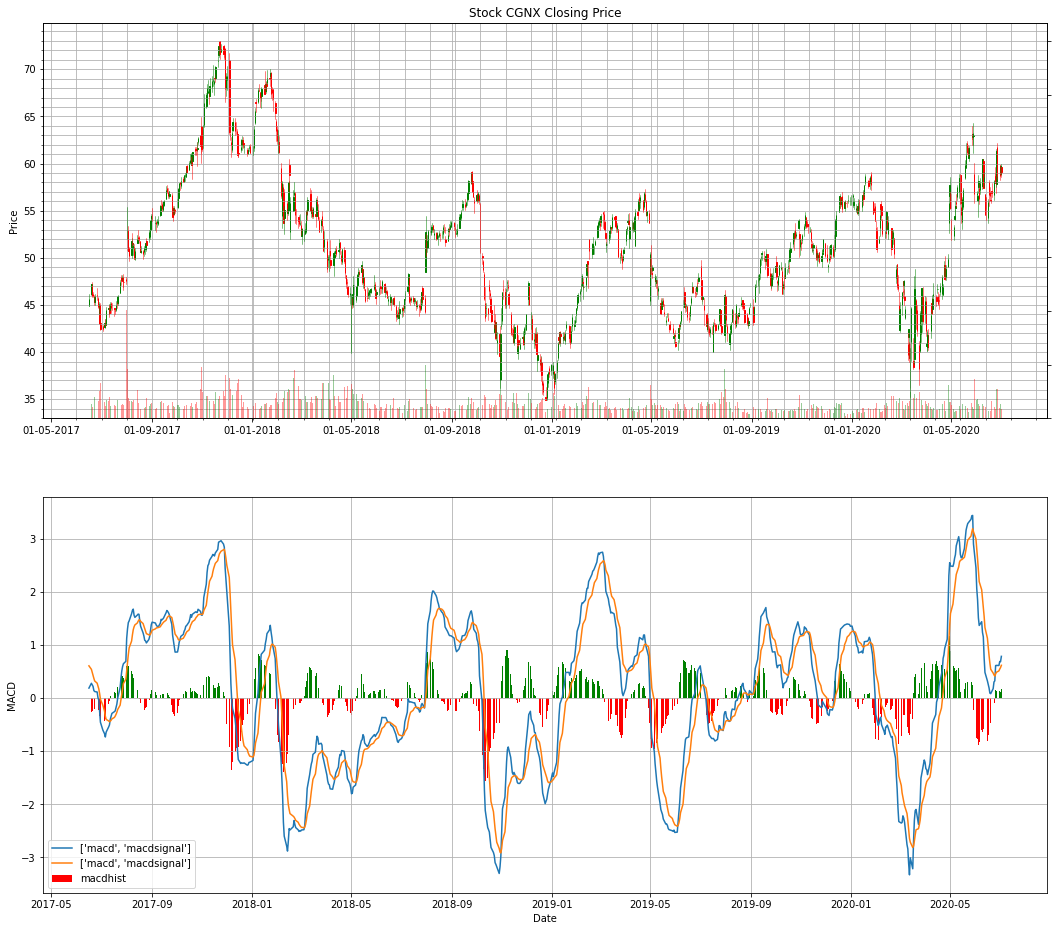

In [ ]:
# Dataframe for Visualization
dfc = df.copy()
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'])

# Candlestick with ADX
fig = plt.figure(figsize=(18,16))

ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
df['positive'] = df['macdhist'] > 0
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], color=df.positive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best');

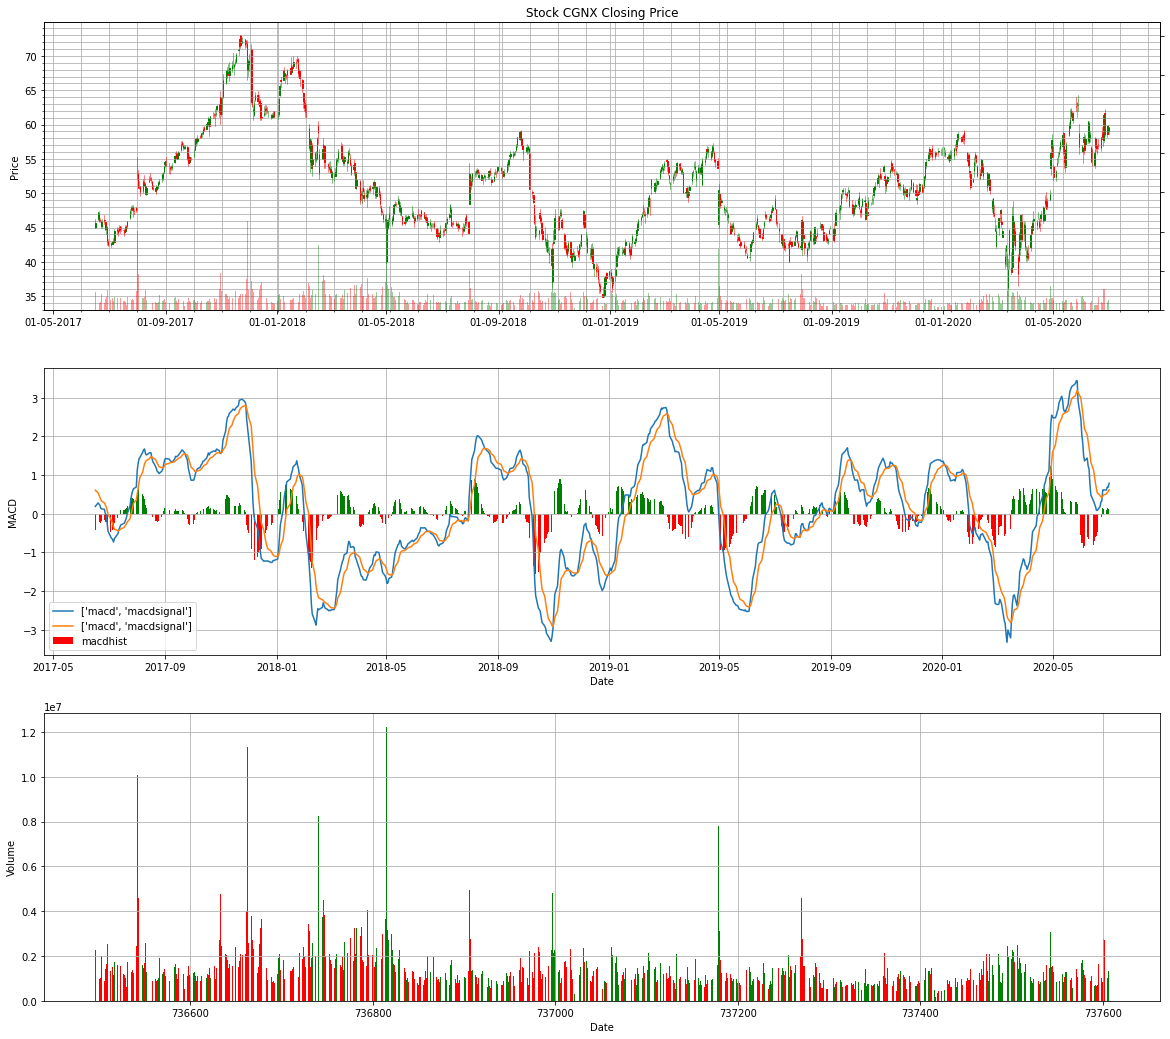

In [ ]:
# Dataframe for Visualization
dfc = df.copy()
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'])

# Candlestick with ADX
fig = plt.figure(figsize=(20,18))

ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(3, 1, 2)
df['positive'] = df['macdhist'] > 0
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], color=df.positive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

ax3 = plt.subplot(3, 1, 3)
ax3.bar(dfc.Date, dfc['Volume'], color=dfc.VolumePositive.map({True: 'g', False: 'r'}))
ax3.grid()
ax3.set_ylabel('Volume')
ax3.set_xlabel('Date');

## OBV (On Balance Volume)

[Investopedia](https://www.investopedia.com/terms/o/onbalancevolume.asp)

[Stock Charts](https://school.stockcharts.com/doku.php?id=technical_indicators:on_balance_volume_obv)

* Uses **volume flow** to predict **changes in price**
* When **volume increases sharply without a significant change in price**, the price will eventually jump **upward or fall downward**
* As mutual and pension funds begin to buy into a stock that instituional investors are selling, volume may increase even as the price remains relatively level
* Eventually, **volume drives the price upward** --> **large investors begin to sell** and smaller investor begin to buy
* Interpretation:
> * Expect prices to **move higher** if OBV is **rising while prices** are either flat or **moving down**
> * Expect prices to **move lower** if OBV is **falling while prices** are either flat or **moving up**

In [ ]:
# OBV
df['OBV'] = ta.OBV(df['Adj_Close'], df['Volume'])/10**6

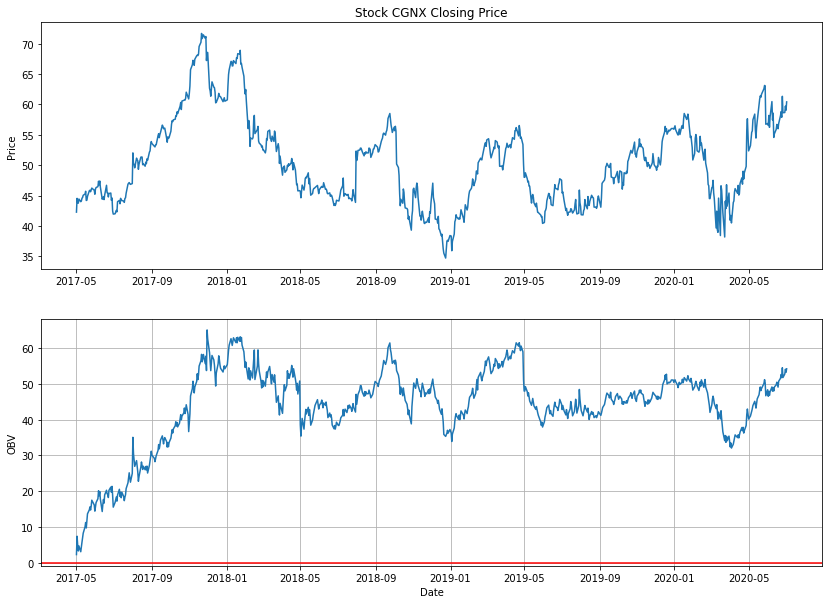

In [ ]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj_Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['OBV'], label='On Balance Volume (M)')
ax2.grid()
ax2.axhline(y=0,color='r')
ax2.set_ylabel('OBV')
ax2.set_xlabel('Date');

## Vortex (VTX)

[Stock charts](https://school.stockcharts.com/doku.php?id=technical_indicators:vortex_indicator)

* Two oscillators that capture positive and negative trend movement
> * Usually 14-day periods

* **Components:**
> * **+VM** --> positive trend movement, distance from current high to prior low (abs value)
>> * the further the current high from prior low, the more positive the trend
> * **-VM** --> negative trend movement, distance from the current low to the prior high (abs value)
>> * the further the current low from the prior high, the more negative the trend movement
> * **+VM14** = 14-period Sum of +VM
> * **-VM14** = 14-period Sum of -VM
> * **True Range (TR)** = the greatest of:
>> * Current High less current Low
>> * Current High less previous Close (abs value)
>> * Current Low less previous Close (abs value) 
> * **TR14** = 14-period Sum of TR
> * **Vortex Indicators** (two volatility-adjusted trends)
>> * **+V14** = +VM14 / TR14
>> * **-V14** = -VM14 / TR14

* **Interpretation**
> * Used to identify the start of a trend and subsequently affirm trend direction
> * First, simple cross of the the two oscillators can be used to signal the start of a trend
> * After this corssover, the **trend is up** when **+VI > -VI** and **trend is down** when **-VI > +VI**

* **Thresholds** --> Reduce false flags (whipsaws), by setting signal thresholds
> * **Bull Threshold** = 1.10
>> * **-VM < 0.9** AND **+VM > 1.10**
> * **Bear Signal** = 0.9 
>> * **+VM < 0.9** AND **-VM > 1.10**

In [ ]:
# Select Period
n = 14

# Positive & Negative Trends
df['Prior_Low'] = df['Low'].shift()
df['Prior_High'] = df['High'].shift()
df['+VM'] = abs(df['High'] - df['Prior_Low'])
df['-VM'] = abs(df['Low'] - df['Prior_High'])

# 14 period Sum of Trend
df['+VM_'+str(n)] = df['+VM'].rolling(n).sum()
df['-VM_'+str(n)] = df['-VM'].rolling(n).sum()

# True Range (TR)
df['HL'] = df['High'] - df['Low']
df['HC'] = abs(df['High'] - df['Adj_Close'].shift())
df['LC'] = abs(df['Low'] -df['Adj_Close'].shift())
df['TR'] = df[['HL','HC','LC']].max(axis=1)

# 14 period Sum of TR
df['TR_'+str(n)] = df['TR'].rolling(n).sum()

# Normalized trend
df['+VI_'+str(n)] = df['+VM_'+str(n)]/df['TR_'+str(n)]
df['-VI_'+str(n)] = df['-VM_'+str(n)]/df['TR_'+str(n)]

df = df.drop(['Prior_Low','Prior_High','+VM','-VM','+VM_14','-VM_14','TR','TR_14','HL','HC','LC'],axis=1)

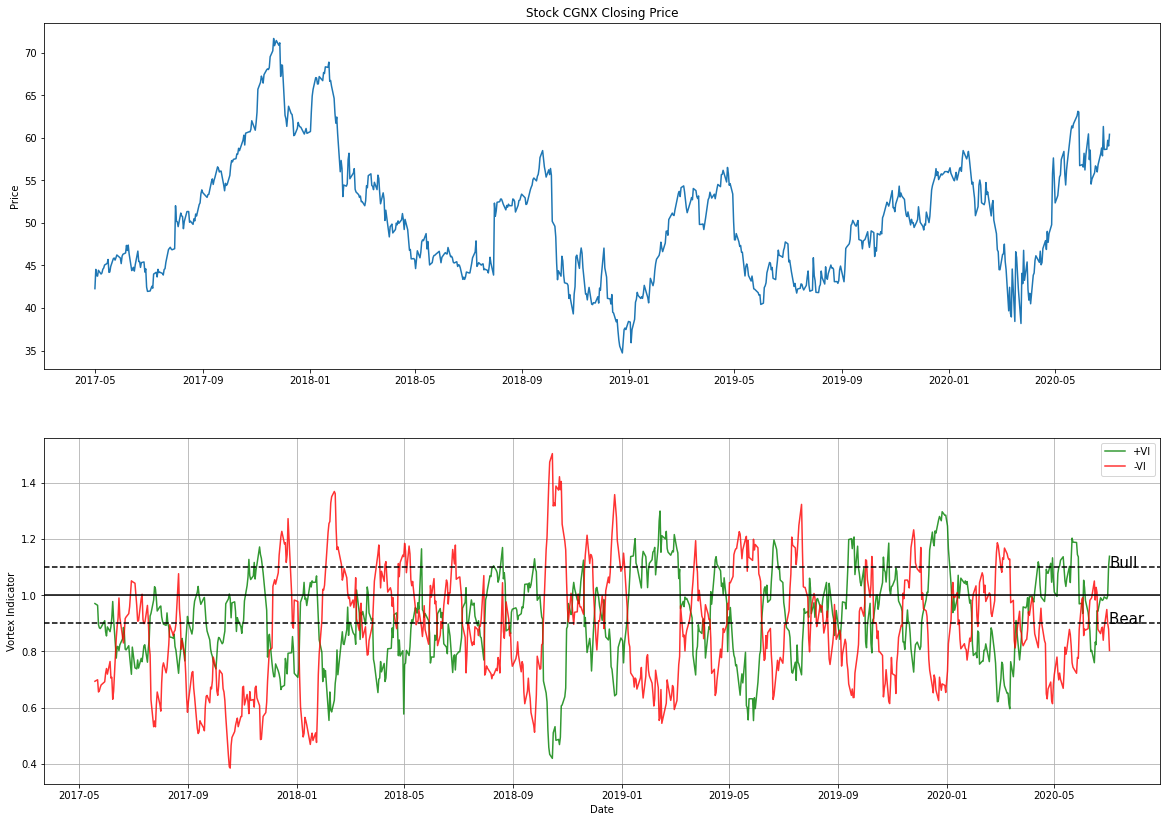

In [ ]:
fig = plt.figure(figsize=(20,14))

ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj_Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
# ax1.legend(loc='best')

# df['AO_Positive'] = df['Aroon_Oscillator'] > 0

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['+VI_14'], label='+VI', color='g', alpha=0.8)
ax2.plot(df['-VI_14'], label='-VI', color='r', alpha=0.8)
ax2.axhline(y=1, color='black')
ax2.text(s='Bull', x=adx.index[-1], y=1.1, fontsize=15)
ax2.text(s='Bear ', x=adx.index[-1], y=0.9, fontsize=15)
ax2.axhline(linestyle ='--', y=1.1, color='k')
ax2.axhline(linestyle ='--', y=0.9, color='k')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Vortex Indicator')
ax2.set_xlabel('Date');

## Using Options

[Using Options YouTube](https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7)

[Implied Volatility](https://blog.quantinsti.com/implied-volatility/)

* Options market generally moves before the stock market does
* Use factors within the options market to make predictions for stock price movements
* Call and Put Contract Volume = the # of call and put options
> * Call option is Bullish | Put option is Bearish

* **Statistical & Implied Volatility** - together tell what the options market is saying about the price of a stock
> * **Statistical Volatility (SV)** = standard deviation of returns for an asset over time
> * Avg deviation from average price in a given period of time
> * **Implied Volatility (IV)** = the measure of expected future volatility in the options market
>> * IV rises when future is uncertain
>> * Options become more expensive when IV rises
>> * VIX (CBOE volatility index) measures the Implied Volatility of options on the S&P 500
> * The **Volatility Difference** between these two can indicate what may happen to stock's price in the future
>> * When **IV** rises without **SV** rising, options are "technically" overpriced (with regards to how much the stock moves)
>> * When Volatility falls, option price falls as well
>> * Volatility Difference doesn't indicate the direction of the price movement

* **Volatility Index (VIX)**
> * VIX consolidates S&P 500's Implied Volatility to a single value
> * Significant, sudden deviations in VIX values are clear indications that market direction could change significantly 

* **Put-Call-Ratio (PCR)**
> * Gauge market direction
> * Traded put options divided by traded call options

In [ ]:
# n = 21

# std = df['returns'].rolling(n).std()


In [ ]:
# from yfinance import options

symbol = 'CGNX'
TICKER_yf = yf.Ticker(symbol)

## show options expirations
expires = TICKER_yf.options
expires
## get option chain for specific expiration
# opt = TICKER_yf.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

# get calls and puts data for some ticker
# returns dictionary with two elements: calls and puts
# chain = TICKER_yf.option_chain(symbol)

# chain['calls'].head()

('2020-07-17', '2020-08-21', '2020-11-20', '2021-02-19')

* https://www.warriortrading.com/best-indicators-for-day-trading/

* https://www.thebalance.com/best-technical-indicators-for-day-trading-1031208

* http://theautomatic.net/2019/04/17/how-to-get-options-data-with-python/

# Comparing Indicators
* Oscillators, Momentum, Oversold/bought
* Market Index vs Individual Stock
* Options Market (VIX)

[Types of Indicators](https://www.visualcapitalist.com/12-types-technical-indicators-stocks/)

### clean and consolidate dataframe

In [ ]:
# drop VIX volume
mk_vix_drop = mk_vix.drop(columns=['Volume'])

In [ ]:
# rename cols
mk_gspc.columns = ['GSPC_' + str(col) for col in mk_gspc.columns]
mk_dow.columns = ['DJI_' + str(col) for col in mk_dow.columns]
mk_vix_drop.columns = ['VIX_' + str(col) for col in mk_vix_drop.columns]
mk_ixic.columns = ['IXIC_' + str(col) for col in mk_ixic.columns]

data = df.join(mk_gspc).join(mk_dow).join(mk_vix_drop).join(mk_ixic)
print("df shape   :", df.shape)
print("data shape :", data.shape)
data.head()

df shape   : (800, 44)
data shape : (800, 71)


Open       High        Low      Close  Adj_Close   Volume  \
Date                                                                         
2017-05-01  43.305000  43.389999  42.080002  42.814999  42.276123  2338400   
2017-05-02  42.650002  45.145000  42.279999  45.110001  44.542233  5112600   
2017-05-03  44.759998  44.840000  43.650002  44.365002  43.806610  2498600   
2017-05-04  44.365002  44.930000  44.105000  44.305000  43.747356  1613800   
2017-05-05  44.494999  45.000000  44.485001  45.000000  44.433620  1397800   

             returns  log_returns  Aroon_Up  Aroon_Down  Aroon_Oscillator  \
Date                                                                        
2017-05-01       NaN          NaN     100.0       100.0               0.0   
2017-05-02  0.053603     0.052215     100.0        96.0               4.0   
2017-05-03 -0.016515    -0.016653      96.0        92.0               4.0   
2017-05-04 -0.001353    -0.001354      92.0        88.0               4.0   
2017-05-05  0.015687     0.015565      88.0        84.0               4.0   

            AO_Positive       BoP  VolumePositive        BI  Beta_GSPC  \
Date                                                                     
2017-05-01        False -0.785404           False       NaN        NaN   
2017-05-02         True  0.660464            True       NaN        NaN   
2017-05-03         True -0.801167           False       NaN        NaN   
2017-05-04         True -0.748660           False       NaN        NaN   
2017-05-05         True -0.119182           False  0.707878        NaN   

            Beta_DJI  Beta_VIX  Beta_IXIC  CCI  ROC_11  ROC_14  COPP  CLV_10  \
Date                                                                           
2017-05-01       NaN       NaN        NaN  NaN     NaN     NaN   NaN     NaN   
2017-05-02       NaN       NaN        NaN  NaN     NaN     NaN   NaN     NaN   
2017-05-03       NaN       NaN        NaN  NaN     NaN     NaN   NaN     NaN   
2017-05-04       NaN       NaN        NaN  NaN     NaN     NaN   NaN     NaN   
2017-05-05       NaN       NaN        NaN  NaN     NaN     NaN   NaN     NaN   

            CMF  Positive  DPO_Stock  DPO_GSPC  DPO_DOW  DPO_VIX  DPO_IXIC  \
Date                                                                         
2017-05-01  NaN     False        NaN       NaN      NaN      NaN       NaN   
2017-05-02  NaN      True        NaN       NaN      NaN      NaN       NaN   
2017-05-03  NaN     False        NaN       NaN      NaN      NaN       NaN   
2017-05-04  NaN     False        NaN       NaN      NaN      NaN       NaN   
2017-05-05  NaN     False        NaN       NaN      NaN      NaN       NaN   

            ADX  Plus_DI  Minus_DI  DX  DMI  RSI  macd  macdsignal  macdhist  \
Date                                                                           
2017-05-01  NaN      NaN       NaN NaN  NaN  NaN   NaN         NaN       NaN   
2017-05-02  NaN      NaN       NaN NaN  NaN  NaN   NaN         NaN       NaN   
2017-05-03  NaN      NaN       NaN NaN  NaN  NaN   NaN         NaN       NaN   
2017-05-04  NaN      NaN       NaN NaN  NaN  NaN   NaN         NaN       NaN   
2017-05-05  NaN      NaN       NaN NaN  NaN  NaN   NaN         NaN       NaN   

            positive     OBV  +VI_14  -VI_14    GSPC_Open    GSPC_High  \
Date                                                                     
2017-05-01     False  2.3384     NaN     NaN  2388.500000  2394.489990   
2017-05-02     False  7.4510     NaN     NaN  2391.050049  2392.929932   
2017-05-03     False  4.9524     NaN     NaN  2386.500000  2389.820068   
2017-05-04     False  3.3386     NaN     NaN  2389.790039  2391.429932   
2017-05-05     False  4.7364     NaN     NaN  2392.370117  2399.290039   

               GSPC_Low   GSPC_Close  GSPC_Adj_Close   GSPC_Volume  \
Date                                                                 
2017-05-01  2384.830078  2388.330078     2388.330078  3.199240e+09   
2017-05-02  2

In [ ]:
legit = data.dropna()

print("Shape  :", legit.shape)
print("Start  :", legit.first_valid_index())
print("Last   :", legit.last_valid_index())

legit.head(3)

Shape  : (766, 71)
Start  : 2017-06-16 00:00:00
Last   : 2020-07-01 00:00:00


Open       High        Low      Close  Adj_Close   Volume  \
Date                                                                         
2017-06-16  44.889999  46.195000  44.880001  45.605000  45.072231  2282600   
2017-06-19  46.185001  47.275002  46.080002  47.244999  46.693069  1316400   
2017-06-20  47.064999  47.410000  45.860001  46.000000  45.462616  1019800   

             returns  log_returns  Aroon_Up  Aroon_Down  Aroon_Oscillator  \
Date                                                                        
2017-06-16  0.016494     0.016360      80.0        84.0              -4.0   
2017-06-19  0.035961     0.035329      76.0        80.0              -4.0   
2017-06-20 -0.026352    -0.026705      72.0        76.0              -4.0   

            AO_Positive       BoP  VolumePositive        BI  Beta_GSPC  \
Date                                                                     
2017-06-16        False  0.138580            True  0.901378   3.337494   
2017-06-19        False  0.425162            True  0.979173   3.198232   
2017-06-20        False -1.033796           False  0.559924   4.199557   

            Beta_DJI  Beta_VIX  Beta_IXIC        CCI    ROC_11    ROC_14  \
Date                                                                       
2017-06-16  6.915729 -0.277806   1.909730 -55.815478 -2.198167 -2.516279   
2017-06-19  4.715273 -0.049070   1.573827  37.670646  0.800089  1.771757   
2017-06-20  6.282593 -0.466247   2.412534   2.503426 -2.179679  0.535478   

                COPP    CLV_10       CMF  Positive  DPO_Stock   DPO_GSPC  \
Date                                                                       
2017-06-16 -0.803634 -0.431667 -0.879606      True   0.384868  10.707206   
2017-06-19 -0.180700  0.159880 -0.847505      True   0.505293  15.539121   
2017-06-20 -0.450050 -0.289191 -0.883046     False   0.630638   9.935814   

              DPO_DOW   DPO_VIX   DPO_IXIC        ADX    Plus_DI   Minus_DI  \
Date                                                                          
2017-06-16  25.314081 -0.784762  44.461054  28.520267  20.158595  17.768927   
2017-06-19  46.186756 -0.720476  94.674595  27.789634  23.101911  15.957415   
2017-06-20  -7.601376 -0.344286  79.586891  26.880462  21.445163  15.830926   

                   DX        DMI        RSI      macd  macdsignal  macdhist  \
Date                                                                          
2017-06-16   6.300616  36.400605  51.205071  0.190068    0.608817 -0.418749   
2017-06-19  18.291397  12.355292  59.602125  0.280084    0.543071 -0.262987   
2017-06-20  15.061230  13.010753  52.250951  0.249262    0.484309 -0.235047   

            positive      OBV    +VI_14    -VI_14    GSPC_Open    GSPC_High  \
Date                                                                          
2017-06-16     False  18.9664  0.823380  0.921134  2431.239990  2433.149902   
2017-06-19     False  20.2828  0.844444  0.851220  2442.550049  2453.820068   
2017-06-20     False  19.2630  0.885307  0.830134  2450.659912  2450.659912   

               GSPC_Low   GSPC_Close  GSPC_Adj_Close   GSPC_Volume  \
Date                                                                 
2017-06-16  2422.879883  2433.149902     2433.149902  5.284720e+09   
2017-06-19  2441.790039  2453.459961     2453.459961  3.264700e+09   
2017-06-20  2436.600098  2437.030029     2437.030029  3.416510e+09   

            GSPC_returns      DJI_Open      DJI_High       DJI_Low  \
Date                                                                 
2017-06-16      0.000284  21335.929688  21384.419922  21308.009766   
2017-06-19      0.008347  21444.750000  21528.990234  21436.080078   
2017-06-20     -0.006697  21521.250000  21535.029297  21464.240234   

               DJI_Close  DJI_Adj_Close   DJI_Volume  DJI_returns  VIX_Open  \
Date                                                                          
2017-06-16  21384.279297   21384.279297  603260000.0     0.

## Momentum Indicators
* Coppock Curve 
* Average Directional Index (ADX)
* Commodity Channel Index (CCI)
* Relative Strength Index (RSI)
* **FIX: Dynamic Momentum Index**
* **TODO Stochastic Oscillator**

## Trend
* Aroon
* Balance of Power (BoP)
* Bollinger Bands
* % B
* Directional Movement Index (DMI)
* Detrend Price Oscillator
* MACD
* Vortex

## Volume
* Chaiken Money Flow (CMF)
* Close Location Value (CVL)
* Accumulation/Distribution Line (ADL)
* OBV

## Volatility
* Average True Range (ATR)
* Beta
* Bollinger Bands & %B
* VIX
* **TODO Keltner Channel (KC)**
* **TODO Donchian Channel (DC)**